In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
from datetime import datetime

In [3]:
labour_data = pd.read_csv('educ_immi_3mma.csv', header=0, 
                         names = ['Month', 'Location','Status','Value','Gender','Age','Total_levels',
                                  'Total_level123','Level1','Level2','Level3','Total_level4567','Total_level45',
                                 'Level4','Level5','Total_level67','Level6','Level7'],
                        na_values = '-')

In [4]:
labour_data.head()

,Month,Location,Status,Value,Gender,Age,Total_levels,Total_level123,Level1,Level2,Level3,Total_level4567,Total_level45,Level4,Level5,Total_level67,Level6,Level7
0,Mar2006,Canada,Total,Population,Both Sexes,15 Years +,25977.3,13469.6,6431.8,5119.6,1918.3,12507.7,7678.5,898.6,6779.9,4829.2,3335.1,1494.1
1,Mar2006,Canada,Total,Population,Both Sexes,15-24,4330.2,3431.4,1795.6,868.5,767.3,898.7,676.2,29.8,646.3,222.6,197.3,25.2
2,Mar2006,Canada,Total,Population,Both Sexes,25 Years +,21647.2,10038.2,4636.2,4251.1,1150.9,11609.0,7002.3,868.8,6133.6,4606.7,3137.8,1468.9
3,Mar2006,Canada,Total,Population,Both Sexes,25-64,17665.4,7342.3,2720.5,3589.4,1032.4,10323.0,6143.0,611.6,5531.5,4180.0,2872.9,1307.1
4,Mar2006,Canada,Total,Population,Both Sexes,55 Years +,7562.2,4459.0,2825.9,1363.5,269.7,3103.2,2008.2,463.2,1545.0,1095.0,686.8,408.1


In [5]:
labour_data.tail()

,Month,Location,Status,Value,Gender,Age,Total_levels,Total_level123,Level1,Level2,Level3,Total_level4567,Total_level45,Level4,Level5,Total_level67,Level6,Level7
424795,Nov2020,Ontario,Born in Canada,Employment rate,Female,15 Years +,56.6,40.3,26.5,45.7,48.3,67.4,63.3,32.8,64.4,71.5,71.0,72.7
424796,Nov2020,Ontario,Born in Canada,Employment rate,Female,15-24,48.1,40.2,32.6,48.4,42.0,71.1,70.6,NaN,70.6,71.5,70.4,81.4
424797,Nov2020,Ontario,Born in Canada,Employment rate,Female,25 Years +,58.4,40.4,21.5,45.0,53.9,67.1,62.8,32.8,64.0,71.5,71.1,72.4
424798,Nov2020,Ontario,Born in Canada,Employment rate,Female,25-64,74.9,62.9,50.6,64.9,66.5,79.0,76.1,52.6,76.6,81.9,81.3,83.4
424799,Nov2020,Ontario,Born in Canada,Employment rate,Female,55 Years +,30.9,24.4,12.8,28.8,34.1,36.6,37.6,25.5,38.6,35.2,33.3,39.1


In [6]:
labour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424800 entries, 0 to 424799
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Month            424800 non-null  object 
 1   Location         424800 non-null  object 
 2   Status           424800 non-null  object 
 3   Value            424800 non-null  object 
 4   Gender           424800 non-null  object 
 5   Age              424800 non-null  object 
 6   Total_levels     424635 non-null  float64
 7   Total_level123   423722 non-null  float64
 8   Level1           420091 non-null  float64
 9   Level2           421480 non-null  float64
 10  Level3           408803 non-null  float64
 11  Total_level4567  423834 non-null  float64
 12  Total_level45    421094 non-null  float64
 13  Level4           348111 non-null  float64
 14  Level5           420704 non-null  float64
 15  Total_level67    421540 non-null  float64
 16  Level6           419932 non-null  floa

In [7]:
len(labour_data['Month'].unique())

177

In [8]:
labour_data['Location'].unique()

array(['Canada', 'Ontario'], dtype=object)

In [9]:
labour_data['Status'].unique()

array(['Total', '  Total Landed immigrants',
       '      Very recent immigrants, 5 years or less',
       '      Recent immigrants 5+ years',
       '          Recent immigrants, 5+ to 10 years',
       '          Established immigrants, 10+ years',
       '  Non-landed immigrants', '  Born in Canada'], dtype=object)

In [10]:
#Remove white space in Status,Age,Gender,Value columns

labour_data['Status'] = labour_data['Status'].apply(lambda x : x.strip())
labour_data['Age'] = labour_data['Age'].apply(lambda x : x.strip())
labour_data['Gender'] = labour_data['Gender'].apply(lambda x : x.strip())
labour_data['Value'] = labour_data['Value'].apply(lambda x : x.strip())

In [11]:
print("Status : ", labour_data['Status'].unique())
print("Age : ", labour_data['Age'].unique())
print("Gender : ", labour_data['Gender'].unique())
print("Value : ", labour_data['Value'].unique())

Status :  ['Total' 'Total Landed immigrants'
 'Very recent immigrants, 5 years or less' 'Recent immigrants 5+ years'
 'Recent immigrants, 5+ to 10 years' 'Established immigrants, 10+ years'
 'Non-landed immigrants' 'Born in Canada']
Age :  ['15 Years +' '15-24' '25 Years +' '25-64' '55 Years +']
Gender :  ['Both Sexes' 'Male' 'Female']
Value :  ['Population' 'Labour force' 'Employment' 'Full-time employment'
 'Part-time employment' 'Unemployment' 'Not in labour force'
 'Unemployment rate' 'Participation rate' 'Employment rate']


In [12]:
# NaN values in all coulumns

labour_data.isna().sum()

Month                  0
Location               0
Status                 0
Value                  0
Gender                 0
Age                    0
Total_levels         165
Total_level123      1078
Level1              4709
Level2              3320
Level3             15997
Total_level4567      966
Total_level45       3706
Level4             76689
Level5              4096
Total_level67       3260
Level6              4868
Level7             24569
dtype: int64

In [13]:
#Number of 0s in each column

labour_data.isin([0.0]).sum()

Month                   0
Location                0
Status                  0
Value                   0
Gender                  0
Age                     0
Total_levels         4363
Total_level123      10995
Level1              34201
Level2              22830
Level3              51579
Total_level4567     11683
Total_level45       26165
Level4             106914
Level5              27117
Total_level67       22187
Level6              28745
Level7              54949
dtype: int64

In [14]:
#pd.options.display.max_rows = 20

In [14]:
#drop total education columns
labour_data.drop(columns=['Total_level123','Total_level4567','Total_level45','Total_level67','Total_levels'], inplace=True)

In [15]:
labour_data['Status'].replace({'Very recent immigrants, 5 years or less':'Immigrant: <5 years',
                             'Recent immigrants, 5+ to 10 years':'Immigrant: 5 to 10 years',
                             'Established immigrants, 10+ years':'Immigrant: >10 years'}, inplace=True)

In [16]:
labour_data['Status'].unique()

array(['Total', 'Total Landed immigrants', 'Immigrant: <5 years',
       'Recent immigrants 5+ years', 'Immigrant: 5 to 10 years',
       'Immigrant: >10 years', 'Non-landed immigrants', 'Born in Canada'],
      dtype=object)

In [17]:
labour_data.rename(columns={'Status':'Immigration Status','Value':'Employment Status'}, inplace=True)

In [18]:
labour_data['Employment Status'].replace({'Full-time employment':'Full-time','Part-time employment':'Part-time',
                                        'Unemployment':'Unemployed'}, inplace=True)

In [19]:
#Create multindex to drop rows that have aggregate values

labour_data.set_index(['Month','Location','Immigration Status','Employment Status','Gender','Age'],inplace=True)

In [20]:
# Drop totals for Immigration Status column

labour_data.drop(['Total','Recent immigrants 5+ years','Total Landed immigrants'],level=2, inplace=True)

In [21]:
labour_data.drop(['Population','Labour force','Employment','Unemployment rate','Participation rate',\
                  'Employment rate'],level=3, inplace=True)

In [22]:
labour_data.drop(['Both Sexes'],level=4, inplace=True)

In [23]:
labour_data.drop(['15 Years +', '25 Years +','55 Years +'],level=5, inplace=True)

In [24]:
labour_data.reset_index(inplace=True)

In [25]:
labour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28320 entries, 0 to 28319
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Month               28320 non-null  object 
 1   Location            28320 non-null  object 
 2   Immigration Status  28320 non-null  object 
 3   Employment Status   28320 non-null  object 
 4   Gender              28320 non-null  object 
 5   Age                 28320 non-null  object 
 6   Level1              27870 non-null  float64
 7   Level2              28091 non-null  float64
 8   Level3              27352 non-null  float64
 9   Level4              15608 non-null  float64
 10  Level5              27563 non-null  float64
 11  Level6              27197 non-null  float64
 12  Level7              21706 non-null  float64
dtypes: float64(7), object(6)
memory usage: 2.8+ MB


### Aggregate columns

Level 1 : No High School
Level 2 : High School
Level 3 : High School and some Post Secondary
Level 4 : Post Secondary Certificate, no High School Diploma
Level 5 : Post Secondary Certificate and High School Diploma
Level 6 : Undergraduate Degree
Level 7 : Graduate Degree

- Level123 = Total Level 1+2+3 = No degree,certificate or diploma
- Level45 = Total Level 4+5 = Post secondary certificate or diploma
- Level67 = Total Level 6+7 = University degree

- Total_levels = Level1+level2+level3+level4+level5+level6+level5

- Immigration Stats : Total Population = Born in Canada + Immigrant: <5 years + Immigrant: 5 to 10 years + Immigrant: >10 years

In [26]:
# Update 0.0 values with 0.724

labour_data.replace({0.0:0.724},inplace=True)

In [27]:
# Fill NaN with 0

labour_data.fillna(value=0, inplace=True)

In [28]:
labour_data.head()

,Month,Location,Immigration Status,Employment Status,Gender,Age,Level1,Level2,Level3,Level4,Level5,Level6,Level7
0,Mar2006,Canada,Immigrant: <5 years,Full-time,Male,15-24,2.600,4.500,4.200,0.724,2.200,3.000,0.724
1,Mar2006,Canada,Immigrant: <5 years,Full-time,Male,25-64,14.000,17.600,9.600,2.700,39.100,60.600,51.100
2,Mar2006,Canada,Immigrant: <5 years,Full-time,Female,15-24,0.724,0.724,0.724,0.000,0.724,0.724,0.000
3,Mar2006,Canada,Immigrant: <5 years,Full-time,Female,25-64,9.400,17.800,3.400,0.724,27.900,50.100,22.500
4,Mar2006,Canada,Immigrant: <5 years,Part-time,Male,15-24,6.000,2.800,0.724,0.000,1.900,0.724,0.000


In [29]:
labour_data.isin([0.0]).sum()

Month                     0
Location                  0
Immigration Status        0
Employment Status         0
Gender                    0
Age                       0
Level1                  450
Level2                  229
Level3                  968
Level4                12712
Level5                  757
Level6                 1123
Level7                 6614
dtype: int64

In [30]:
labour_data['Level123'] = labour_data['Level1'] + labour_data['Level2'] + labour_data['Level3']

In [31]:
labour_data['Level45'] = labour_data['Level4'] + labour_data['Level5']

In [32]:
labour_data['Level67'] = labour_data['Level6'] + labour_data['Level7']

In [33]:
labour_data['Total_levels'] = labour_data['Level123'] + labour_data['Level45'] + labour_data['Level67']

In [34]:
# Convert Month dtype to datetime

labour_data['Month'] = pd.to_datetime(labour_data['Month'])

In [35]:
labour_data.head()
#dfi.export(labour_data.head(15),'labour_data.png')

,Month,Location,Immigration Status,Employment Status,Gender,Age,Level1,Level2,Level3,Level4,Level5,Level6,Level7,Level123,Level45,Level67,Total_levels
0,2006-03-01,Canada,Immigrant: <5 years,Full-time,Male,15-24,2.600,4.500,4.200,0.724,2.200,3.000,0.724,11.300,2.924,3.724,17.948
1,2006-03-01,Canada,Immigrant: <5 years,Full-time,Male,25-64,14.000,17.600,9.600,2.700,39.100,60.600,51.100,41.200,41.800,111.700,194.700
2,2006-03-01,Canada,Immigrant: <5 years,Full-time,Female,15-24,0.724,0.724,0.724,0.000,0.724,0.724,0.000,2.172,0.724,0.724,3.620
3,2006-03-01,Canada,Immigrant: <5 years,Full-time,Female,25-64,9.400,17.800,3.400,0.724,27.900,50.100,22.500,30.600,28.624,72.600,131.824
4,2006-03-01,Canada,Immigrant: <5 years,Part-time,Male,15-24,6.000,2.800,0.724,0.000,1.900,0.724,0.000,9.524,1.900,0.724,12.148


#### Separate Ontario and Canada data

In [36]:
#separate Ontario and Canada data into separate data frames and drop Location columns

ontario_data = labour_data[labour_data['Location'] == 'Ontario'].copy()
canada_data = labour_data[labour_data['Location'] == 'Canada'].copy()

ontario_data.drop(columns='Location', inplace=True)
canada_data.drop(columns='Location', inplace=True)

In [37]:
ontario_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14160 entries, 80 to 28319
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Month               14160 non-null  datetime64[ns]
 1   Immigration Status  14160 non-null  object        
 2   Employment Status   14160 non-null  object        
 3   Gender              14160 non-null  object        
 4   Age                 14160 non-null  object        
 5   Level1              14160 non-null  float64       
 6   Level2              14160 non-null  float64       
 7   Level3              14160 non-null  float64       
 8   Level4              14160 non-null  float64       
 9   Level5              14160 non-null  float64       
 10  Level6              14160 non-null  float64       
 11  Level7              14160 non-null  float64       
 12  Level123            14160 non-null  float64       
 13  Level45             14160 non-null  float64  

In [38]:
ontario_data.set_index(['Month','Immigration Status','Employment Status','Gender','Age'],inplace=True)

In [39]:
ontario_data.index.get_level_values(0).unique()

DatetimeIndex(['2006-03-01', '2006-04-01', '2006-05-01', '2006-06-01',
               '2006-07-01', '2006-08-01', '2006-09-01', '2006-10-01',
               '2006-11-01', '2006-12-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='Month', length=177, freq=None)

In [40]:
#Index values for ontario_data

for level in range(1,5):
    print("Index level ",level,"values:", ontario_data.index.get_level_values(level).unique(),'\n')

Index level  1 values: Index(['Immigrant: <5 years', 'Immigrant: 5 to 10 years',
       'Immigrant: >10 years', 'Non-landed immigrants', 'Born in Canada'],
      dtype='object', name='Immigration Status') 

Index level  2 values: Index(['Full-time', 'Part-time', 'Unemployed', 'Not in labour force'], dtype='object', name='Employment Status') 

Index level  3 values: Index(['Male', 'Female'], dtype='object', name='Gender') 

Index level  4 values: Index(['15-24', '25-64'], dtype='object', name='Age') 



In [41]:
idx = pd.IndexSlice

In [42]:
ontario_data.loc[idx['2006-03-01','Immigrant: <5 years',:,:,:], : ]

Level1  \
Month      Immigration Status  Employment Status   Gender Age             
2006-03-01 Immigrant: <5 years Full-time           Male   15-24   0.724   
                                                          25-64   7.000   
                                                   Female 15-24   0.724   
                                                          25-64   3.600   
                               Part-time           Male   15-24   3.600   
                                                          25-64   0.724   
                                                   Female 15-24   0.724   
                                                          25-64   0.724   
                               Unemployed          Male   15-24   0.724   
                                                          25-64   0.724   
                                                   Female 15-24   0.724   
                                                          25-64   0.724   
                               Not in labour force Male   15-24  18.700   
                                                          25-64   0.724   
                                                   Female 15-24  12.700   
                                                          25-64  12.000   

                                                                 Level2  \
Month      Immigration Status  Employment Status   Gender Age             
2006-03-01 Immigrant: <5 years Full-time           Male   15-24   3.200   
                                                          25-64  10.600   
                                                   Female 15-24   0.724   
                                                          25-64  11.900   
                               Part-time           Male   15-24   2.200   
                                                          25-64   1.500   
                                                   Female 15-24   0.724   
                                                          25-64   1.900   
                               Unemployed          Male   15-24   0.724   
                                                          25-64   2.300   
                                                   Female 15-24   0.000   
                                                          25-64   2.200   
                               Not in labour force Male   15-24   2.700   
                                                          25-64   3.600   
                                                   Female 15-24   0.724   
                                                          25-64  17.400   

                                                                 Level3  \
Month      Immigration Status  Employment Status   Gender Age             
2006-03-01 Immigrant: <5 years Full-time           Male   15-24   3.100   
                                                          25-64   4.700   
                                                   Female 15-24   0.000   
                                                          25-64   0.724   
                               Part-time           Male   15-24   0.724   
                                                          25-64   0.000   
                                                   Female 15-24   0.724   
                                                          25-64   1.600   
                               Unemployed          Male   15-24   0.724   
                                                          25-64   0.724   
                                                   Female 15-24   0.724   
                                                          25-64   0.724   
                               Not in labour force Male   15-24   1.700   
                                                          25-64   0.724   
                                                   Female 15-24   2.200   
                                                          25-64   4.200   

            

### Ontario & Canada employment data
ontario_employment - Totals for different Immigration Status month-wise employment Status

ontario_unemployment - Ontario unemployment totals for different immigration status. Till Jan 2020

ontario_unemployment2020 - Same data as above from Feb 2020 to Sep 2020.

ontario_unemp_levels - Ontario unemployment totals for different education levels.

canada_employment - Totals for different Immigration Status month-wise employment Status

In [43]:
#Create a dataframe with Ontario employment totals based on immigration status

ontario_employment = ontario_data.sum(level=[0,1,2])


In [44]:
import dataframe_image as dfi

In [45]:
ontario_employment

#Save dataframe preview

#dfi.export(ontario_employment.head(15),'ontario_emp.png')

Level1   Level2  \
Month      Immigration Status       Employment Status                       
2006-03-01 Immigrant: <5 years      Full-time             12.048   26.424   
                                    Part-time              5.772    6.324   
                                    Unemployed             2.896    5.224   
                                    Not in labour force   44.124   24.424   
           Immigrant: 5 to 10 years Full-time             14.124   27.124   
...                                                          ...      ...   
2020-11-01 Non-landed immigrants    Not in labour force   17.600   16.800   
           Born in Canada           Full-time            149.700  708.000   
                                    Part-time            131.700  187.700   
                                    Unemployed            70.200   90.400   
                                    Not in labour force  388.300  379.700   

                                                          Level3  Level4  \
Month      Immigration Status       Employment Status                      
2006-03-01 Immigrant: <5 years      Full-time              8.524   2.724   
                                    Part-time              3.048   0.724   
                                    Unemployed             2.896   0.724   
                                    Not in labour force    8.824   1.448   
           Immigrant: 5 to 10 years Full-time              8.324   0.724   
...                                                          ...     ...   
2020-11-01 Non-landed immigrants    Not in labour force   15.724   0.000   
           Born in Canada           Full-time            171.700  32.224   
                                    Part-time            106.100   5.300   
                                    Unemployed            43.800   1.448   
                                    Not in labour force  154.200  16.000   

                                                           Level5   Level6  \
Month      Immigration Status       Employment Status                        
2006-03-01 Immigrant: <5 years      Full-time              34.500   65.424   
                                    Part-time              10.800    8.748   
                                    Unemployed              4.624    7.724   
                                    Not in labour force    15.524   21.424   
           Immigrant: 5 to 10 years Full-time              47.948   73.924   
...                                                           ...      ...   
2020-11-01 Non-landed immigrants    Not in labour force     9.900   14.800   
           Born in Canada           Full-time            1327.900  942.500   
                                    Part-time             207.900  132.800   
                                    Unemployed             97.100   81.100   
                                    Not in labour force   298.000  170.200   

                                                          Level7  Level123  \
Month      Immigration Status       Employment Status                        
2006-03-01 Immigrant: <5 years      Full-time             47.024    46.996   
                                    Part-time              6.000    15.144   
                                    Unemployed             9.424    11.016   
                                    Not in labour force   15.724    77.372   
           Immigrant: 5 to 10 years Full-time             50.000    49.572   
...                                                          ...       ...   
2020-11-01 Non-landed immigrants    Not in labour force   11.524    50.124   
           Born in Canada           Full-time            391.324  1029.400   
                                    Part-time             44.448   425.500   
                                    Unemployed            22.024   204.400   
                                    Not in labour force   48.724   922.200   

                                     

## Ontario immigrant unemployment analysis

In [46]:
ontario_unemployment = ontario_employment.loc[idx[ : , ['Immigrant: <5 years', 'Immigrant: 5 to 10 years',\
    'Immigrant: >10 years','Born in Canada'],'Unemployed'], 'Total_levels' ].sort_index(level=0).unstack(level=1)

In [47]:
ontario_unemployment = ontario_unemployment.reset_index().set_index('Month').drop(columns='Employment Status')

In [48]:
ontario_unemployment.head()

Immigration Status,Born in Canada,Immigrant: 5 to 10 years,Immigrant: <5 years,Immigrant: >10 years
Month,,,,
2006-03-01,300.720,20.060,33.512,76.516
2006-04-01,292.396,18.660,31.836,74.540
2006-05-01,291.296,22.460,29.960,75.592
2006-06-01,276.796,25.888,32.988,71.340
2006-07-01,289.272,34.112,38.688,74.840


In [49]:
# Dataframe with unemployment details for 2020

ontario_unemployment2020 = ontario_unemployment.loc['2020-02-01':'2020-11-01'].copy()

In [50]:
ontario_unemployment2020.index.get_level_values(0).unique()

DatetimeIndex(['2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [51]:
#Delete unemployment details for 2020 from ontario_unemployment

ontario_unemployment.drop(index=ontario_unemployment['2020-02-01':'2020-11-01'].index, inplace=True)

#### ANOVA test: We are interested to see if  unemployment is significantly different across differet immigration groups in Ontario. 

$H_0$ : Average unemployment is same across all immigrant groups.
$H_a$: At least one group has different mean.

In [52]:
ontario_unemployment.stack().groupby('Immigration Status').agg(['mean','std','min','max','count'])

,mean,std,min,max,count
Immigration Status,,,,,
Born in Canada,327.362802,53.970155,223.044,453.496,167
Immigrant: 5 to 10 years,32.568934,7.524971,17.108,59.116,167
Immigrant: <5 years,33.668311,6.643537,20.912,60.468,167
Immigrant: >10 years,100.765054,17.143985,66.636,149.768,167


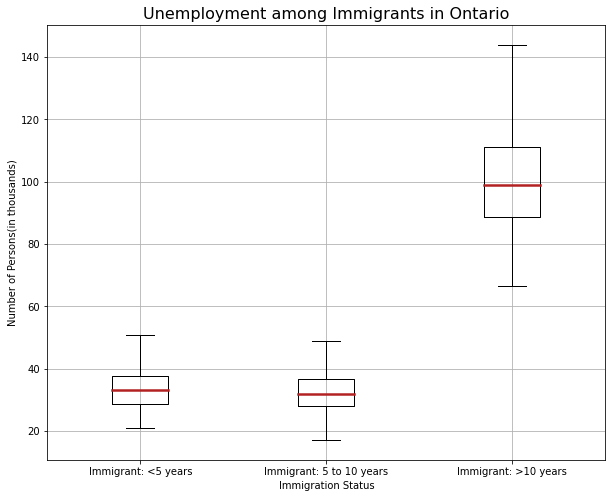

In [53]:
medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(ontario_unemployment[['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years']],\
            labels=['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years'], showfliers=False,
           medianprops=medianprops)
plt.xlabel("Immigration Status")
plt.ylabel("Number of Persons(in thousands)")
plt.title("Unemployment among Immigrants in Ontario", fontsize=16)
plt.grid(True);
#plt.ylim([0,150])
#plt.xticks(rotation=90)
#plt.savefig('unempImm_Ont.png');

Average people unemployed is almost same between immigrants < 5 years and immigrants between 5 to 10 years, but high in immigrants > 10 years. The average and the data variability is high for the immigrant group > 10 years. On comparing the difference in averages with the data variablity using anova test to see if it is statistically significant at 0.05, we get a high F-value and a very small p-value which suggests the null hypothesis to be false. Therefore we reject the null hypothesis and conclude that unemployment average  is different in atleast one immigrant group. We find the pairs that that have different averages using MultiComparison.allpairtest with Bonferroni correction.

Average unemployment between the pairs immigrants:5 to 10 years and immigrants: >10 years and immigrants: < 5 years and immigrants: >10 years are different and statistically significant.

In [54]:
stats.f_oneway(ontario_unemployment['Immigrant: <5 years'], ontario_unemployment['Immigrant: 5 to 10 years'],
              ontario_unemployment['Immigrant: >10 years'])

F_onewayResult(statistic=1936.6420775460233, pvalue=1.2544568047828377e-235)

In [55]:
import statsmodels.stats.multicomp as mc

In [56]:
# Stack and drop 'Born in Canada' data to use in MultiComparison to find the group that is different

on_umemp = ontario_unemployment.stack().to_frame().drop('Born in Canada', level=1).reset_index().\
rename(columns={0:'Total_levels'})

In [57]:
on_umemp.head(4)

,Month,Immigration Status,Total_levels
0,2006-03-01,Immigrant: 5 to 10 years,20.060
1,2006-03-01,Immigrant: <5 years,33.512
2,2006-03-01,Immigrant: >10 years,76.516
3,2006-04-01,Immigrant: 5 to 10 years,18.660


In [58]:
#Compare using Bonferroni method

comparisons = mc.MultiComparison(on_umemp['Total_levels'], on_umemp['Immigration Status'])
table, a1, a2 = comparisons.allpairtest(stats.ttest_ind, method='bonf')
table


group1,group2,stat,pval,pval_corr,reject
Immigrant: 5 to 10 years,Immigrant: <5 years,-1.4153,0.1579,0.4737,False
Immigrant: 5 to 10 years,Immigrant: >10 years,-47.0704,0.0,0.0,True
Immigrant: <5 years,Immigrant: >10 years,-47.1593,0.0,0.0,True


In [327]:
#ontario_unemployment.reset_index()
#sns.boxplot(x= ontario_unemployment['Immigration Status'], y ='Total_levels',data=ontario_unemployment);

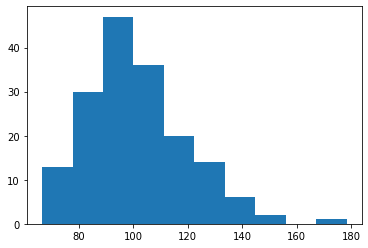

In [301]:
#plt.hist(ontario_unemployment['Immigrant: >10 years']);

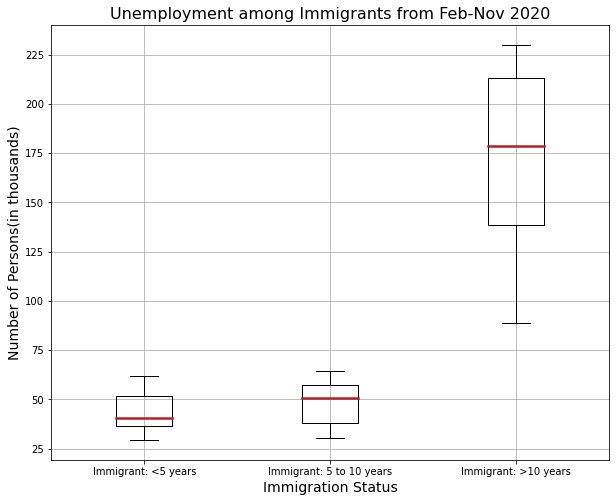

In [59]:
medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(ontario_unemployment2020[['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years']],\
            labels=['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years'], showfliers=False,
           medianprops=medianprops)
plt.xlabel("Immigration Status", fontsize=14)
plt.ylabel("Number of Persons(in thousands)", fontsize=14)
plt.title("Unemployment among Immigrants from Feb-Nov 2020", fontsize=16)
plt.grid(True)
#plt.ylim([0,150])
#plt.xticks(rotation=90);

In [60]:
ontario_unemployment2020.stack().to_frame().groupby('Immigration Status').agg(['mean','std','min','max','count'])

0                                    
                              mean         std      min      max count
Immigration Status                                                    
Born in Canada            454.9792  121.939436  239.796  591.172    10
Immigrant: 5 to 10 years   48.7536   12.582166   30.464   64.492    10
Immigrant: <5 years        43.5752   10.216483   29.312   61.820    10
Immigrant: >10 years      170.8664   50.281515   88.616  230.120    10

### Time series plot and autocorrelation for unemployment among immigrants in Ontario

In [61]:
# Function to lineplots

def line_plot(df,col_list,name,xlab,ylab):

    plt.figure(figsize=(12,8))
    plt.title(name, fontsize=16)
    plt.xlabel(xlab, fontsize=14)
    plt.ylabel(ylab, fontsize=14)
    
    for col in col_list:

        sns.lineplot(x=df.index, y=df[col], label=col)
        plt.legend()
        
plt.show()

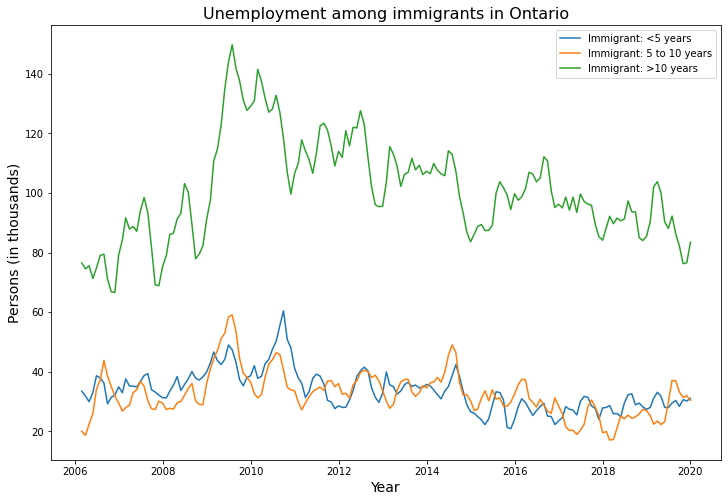

In [62]:
# Plot time series unemployment among immigrants in Ontario

line_plot(ontario_unemployment,['Immigrant: <5 years', 'Immigrant: 5 to 10 years', 'Immigrant: >10 years'],
         "Unemployment among immigrants in Ontario","Year","Persons (in thousands)")

#plt.savefig('ONtimeSe_immgUnemp.png');

In [63]:
# Function to plot autocorrelation plots

def plot_autocorr(df,rows,cols):
    
    plt.figure(figsize=(20,12))
    #plt.suptitle("Unemployment among immigrants", fontsize=18)
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for i, column in enumerate(df.columns):
    
        ax = plt.subplot(rows,cols,i+1)
        pd.plotting.autocorrelation_plot(df[column], ax=ax)
        plt.title(column,fontsize=14)
        plt.xlim([0,100])
        
plt.show()

Text(0.5, 0.98, 'Unemployment among immigrants')

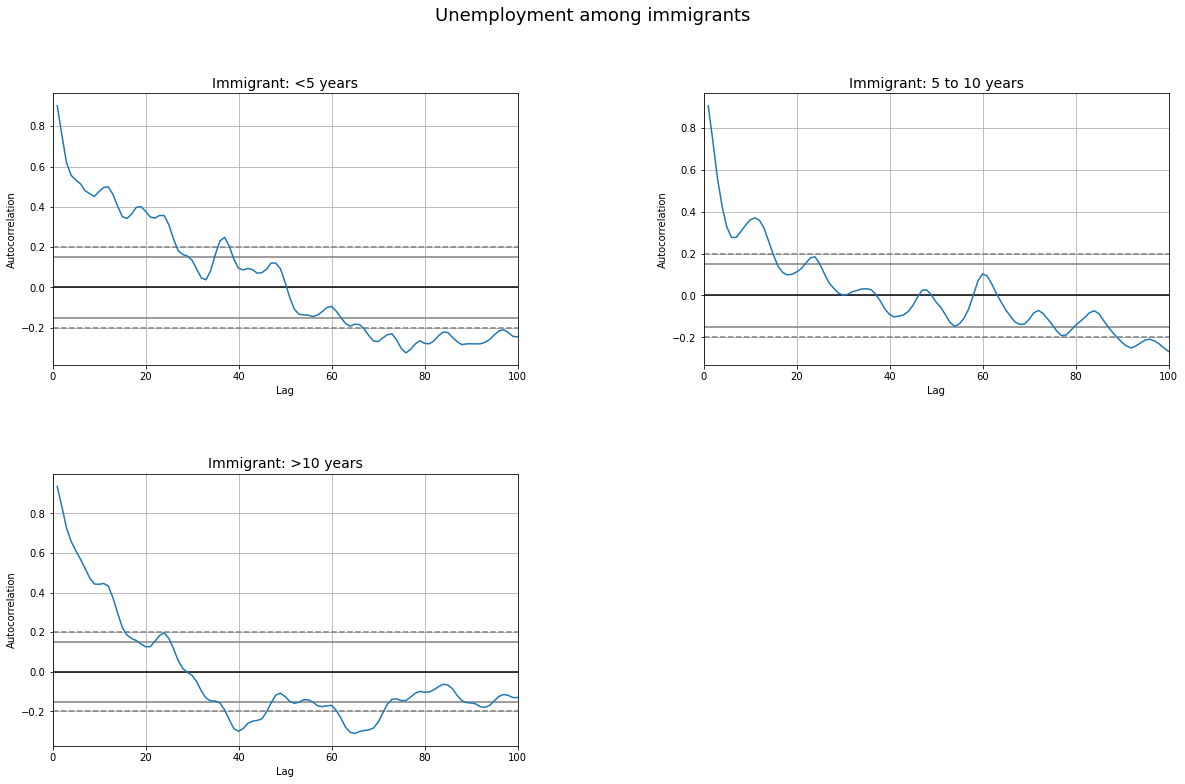

In [64]:
#Plot autocorrelation plots for unemployment among immigrants

plot_autocorr(ontario_unemployment[['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years']],2,2)
plt.suptitle("Unemployment among immigrants", fontsize=18)

#plt.savefig("Imgunemp_autocorr.png")

In [65]:
from statsmodels.graphics import tsaplots

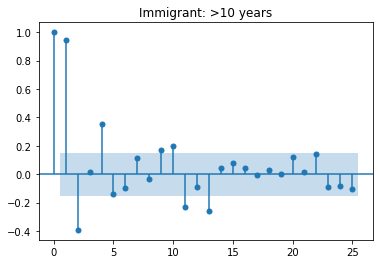

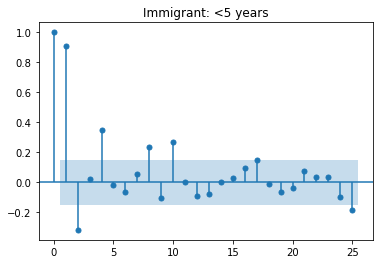

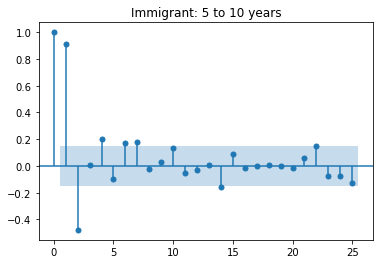

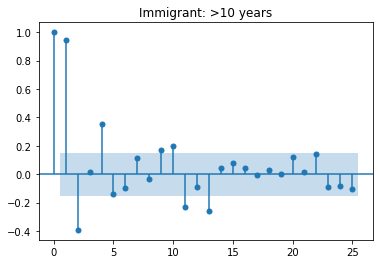

In [66]:

#tsaplots.plot_acf(ontario_unemployment['Immigrant: <5 years'], lags=25)
tsaplots.plot_pacf(ontario_unemployment['Immigrant: <5 years'], lags=25, title='Immigrant: <5 years')
tsaplots.plot_pacf(ontario_unemployment['Immigrant: 5 to 10 years'], lags=25, title='Immigrant: 5 to 10 years')
tsaplots.plot_pacf(ontario_unemployment['Immigrant: >10 years'], lags=25, title='Immigrant: >10 years')

#plt.savefig("Imgunemp_partAutocorr.png")

###  Analysis of autocorrelation of unemployment among immigrants:

From the autocorrelation plots we see that for immigrants<5 years there is significant autocorrelation upto lag corresponding to 25 months, for immigrants 5 to 10 years and immigrants>10 years there is autocorrelation upto a lag of 12 months. 
The partial autocorrelation plot for immigrants<5 years suggest a positive correlation at lag=1, 4, 8, 10 month and a negative correlation at the 2nd and 25th month. For immigrants 5 to 10 years, there is a positive correlation the 1,4,6,7 month and negative correlation the 2, 14 months. For immigrants>10 years, postive correlation is for the 1st, 4, 9,10 months and negative correlation is for the 2,11,13 month. 



### Time series decomposition for unemployed Ontario immigrants

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [68]:
#Function to plot additive and multiplicative seasonal decomposition

def plot_seasoncalDeco(df):

    plt.rcParams['figure.figsize'] = (15,10)
    
    for column in df.columns:
    
            
        data_additive = seasonal_decompose(df[column], model='additive')
        data_multi = seasonal_decompose(df[column], model='multiplicative')
    
        data_additive.plot()
        data_multi.plot()
        plt.show()
        
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]    


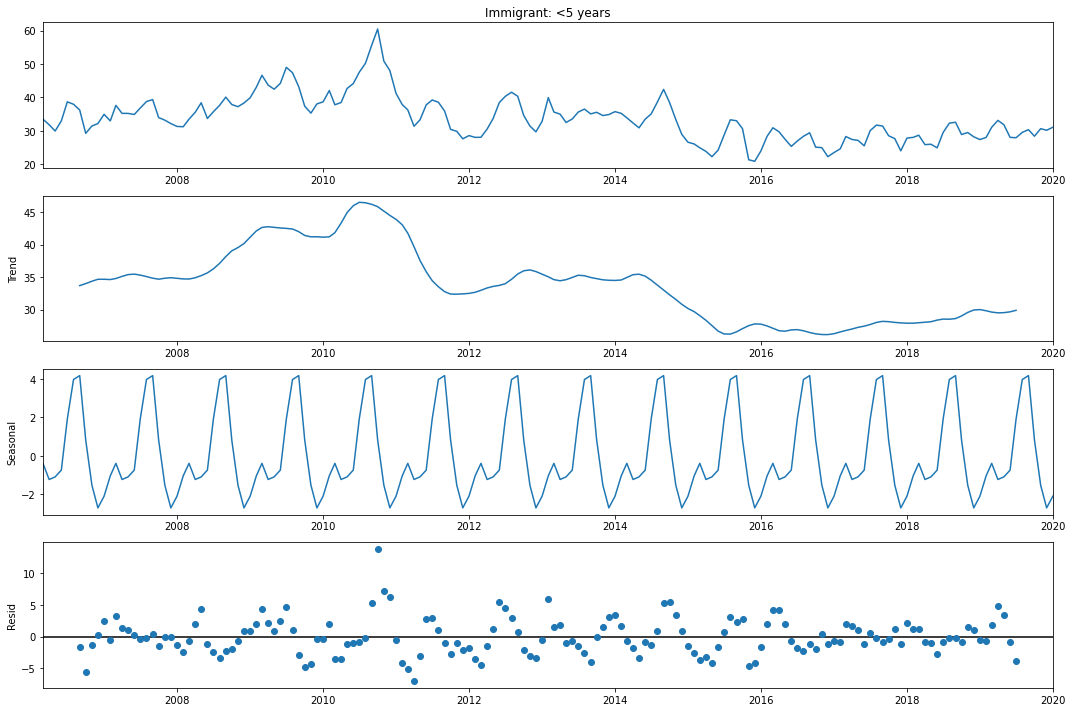

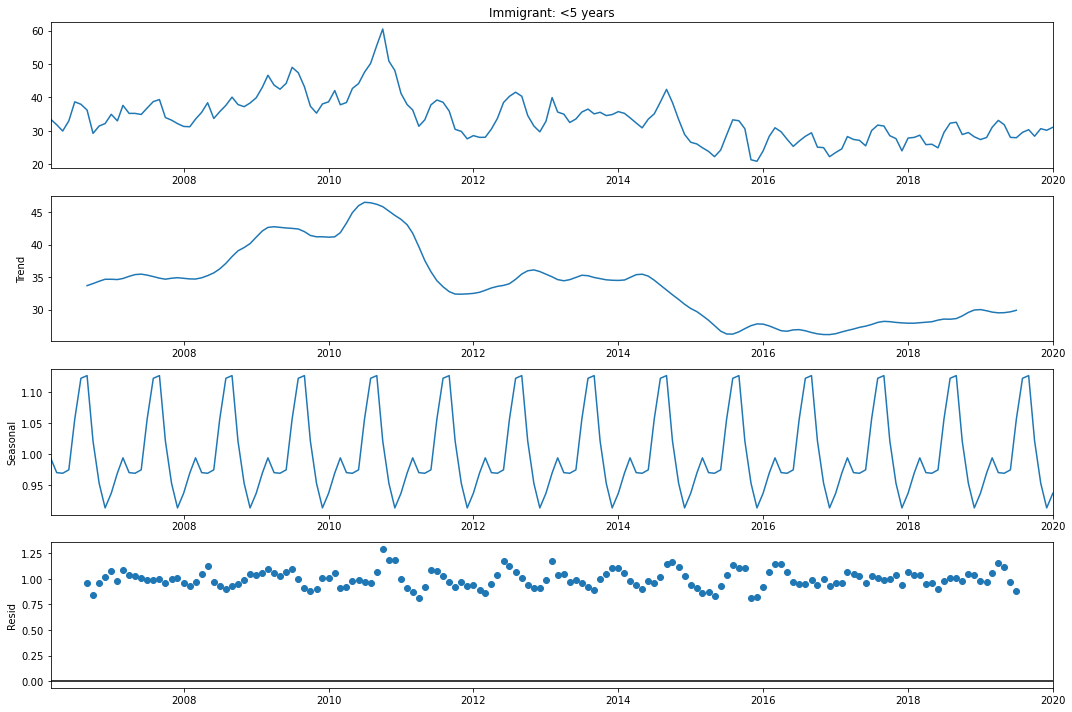

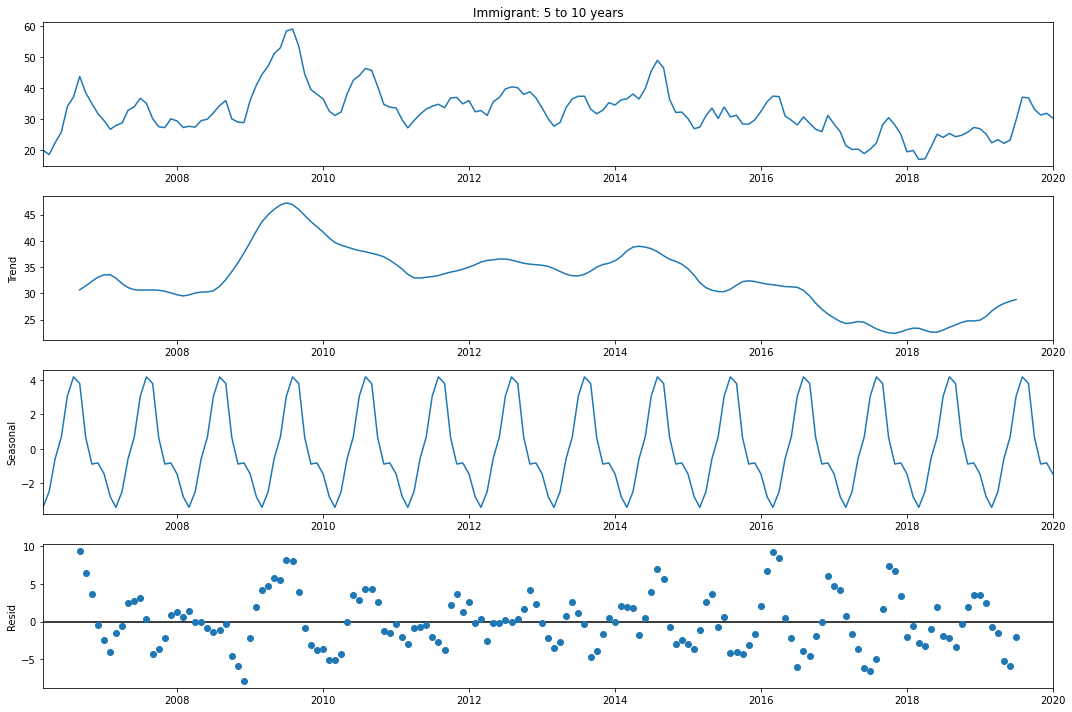

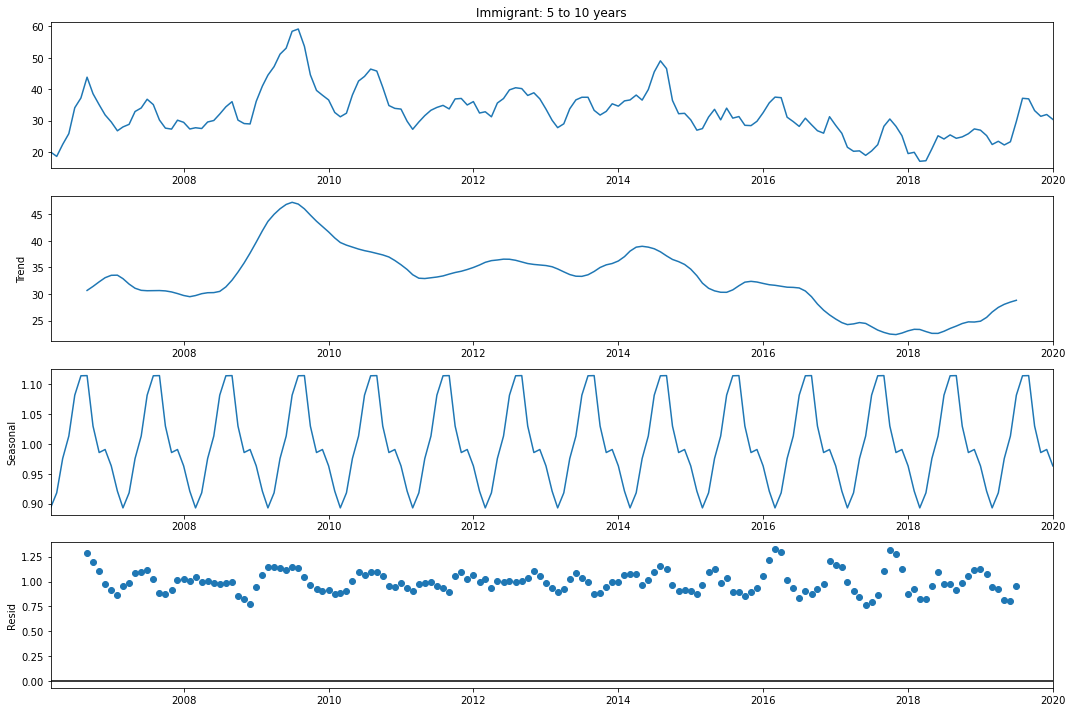

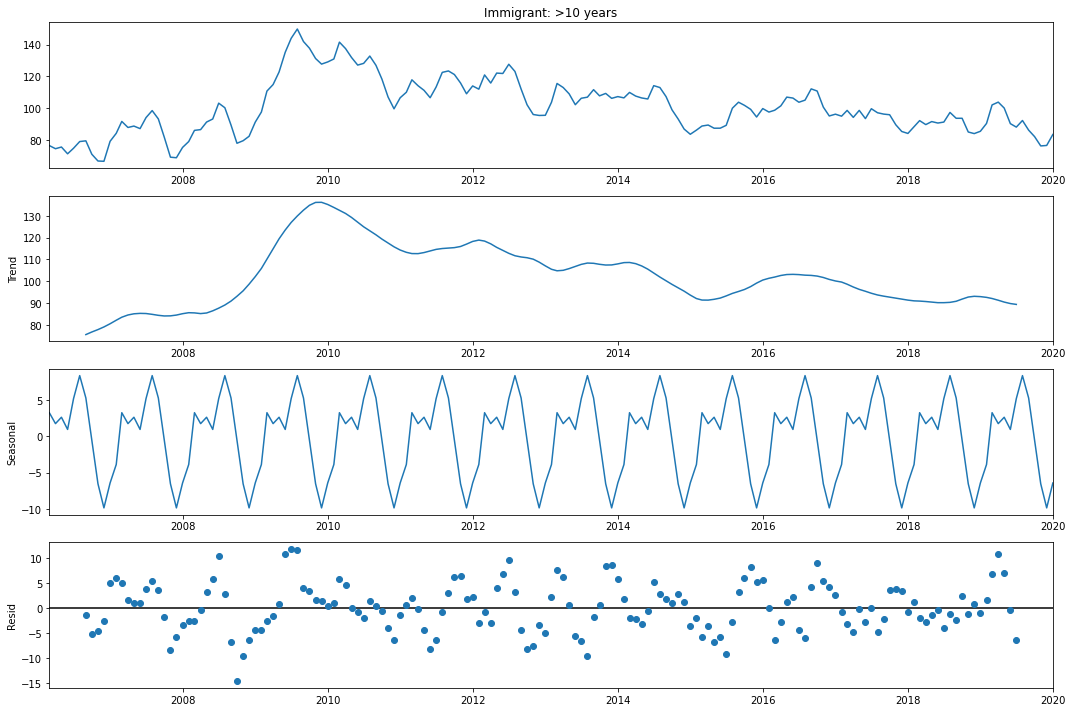

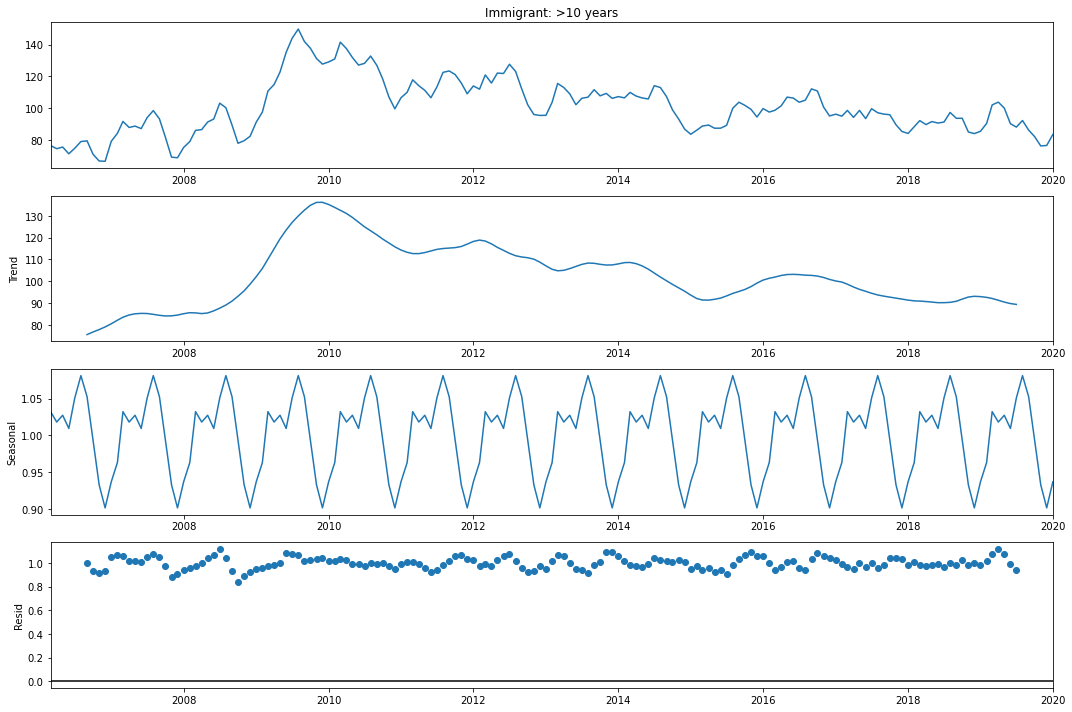

<Figure size 1080x720 with 0 Axes>

In [69]:
# Plot additive and mutiplicative seasonal decomposition for Ontario immigrant groups

plot_seasoncalDeco(ontario_unemployment[['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years']])

#plt.savefig("Immunem_SeasDecompose.png")

In [134]:
#Reset the figure size back to default

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

In [71]:
#Decompose for Immigrant: <5 years to plot residuals 

immig_5add = seasonal_decompose(ontario_unemployment['Immigrant: <5 years'], model='additive')
immig_5mul = seasonal_decompose(ontario_unemployment['Immigrant: <5 years'], model='multiplicative')

r1 = immig_5add.resid.dropna()
r2 = immig_5mul.resid.dropna()

m1 = r1.mean()
m2 = r2.mean()


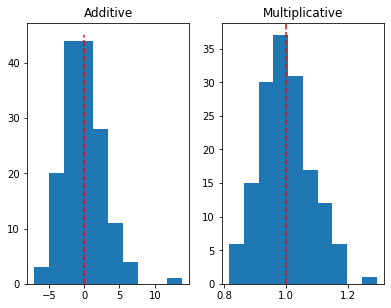

In [72]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.hist(r1)
ax1.set_title('Additive')
ax1.vlines(x=m1,ymin=0, ymax=45, color='r', linestyles='dashed')

ax2.hist(r2)
ax2.set_title('Multiplicative')
ax2.axvline(x=m2, color='r', linestyle='dashed');

#The residuals of the additive model are more spread out than the multiplicative model.

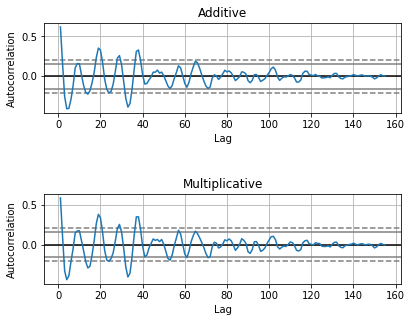

In [73]:
#Assess the independence of the residuals for Immigrant: <5 years by calculating their autocorrelation

fig, (ax1,ax2) = plt.subplots(2,1)

pd.plotting.autocorrelation_plot(r1, ax=ax1)
pd.plotting.autocorrelation_plot(r2, ax=ax2)

ax1.set_title('Additive')
ax2.set_title('Multiplicative')

plt.subplots_adjust(hspace=0.9);

Immigrants < 5 years: Autocorrelation between the residuals of the 2 models are very similar. Also, magnitude of the seasonal component in both additive and multiplicative models does not vary much from the actual signals. I went ahead and calculated the strength of trend and seasonality for both the models and found a strong trend for the multiplicative model. So used the multiplicative model for  analysis.

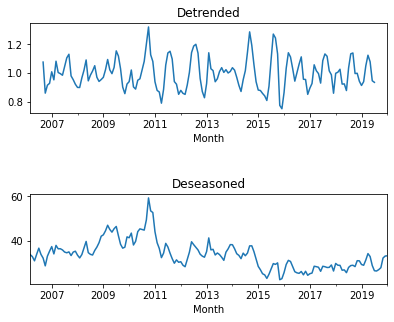

In [74]:
# Remove seasonality and trend from the original signal for the additive model

ontario_unemployment['detrended'] = ontario_unemployment['Immigrant: <5 years'] / immig_5mul.trend
ontario_unemployment['deseasoned'] = ontario_unemployment['Immigrant: <5 years'] / immig_5mul.seasonal

fig, (ax1,ax2) = plt.subplots(2,1)

ontario_unemployment['detrended'].plot(ax=ax1)
ontario_unemployment['deseasoned'].plot(ax=ax2)

ax1.set_title('Detrended')
ax2.set_title('Deseasoned')

plt.subplots_adjust(hspace=0.9);

In [901]:
#ontario_unemployment.drop(columns=['detrended','deseasoned'], inplace=True)
#ontario_unemployment.drop(columns=['detrendedImmigrant: 5 to 10 years','deseasonedImmigrant: 5 to 10 years'], inplace=True)

In [75]:
# Calculate trend and seasonality strength

trend_strength = 1. - np.var(immig_5mul.resid) / np.var(immig_5mul.resid * immig_5mul.trend)
seasonality_strength = 1. - np.var(immig_5mul.resid) / np.var(immig_5mul.resid * immig_5mul.seasonal)

print ('Strength of trend is: %1.3f' % trend_strength)
print ('Strength of seasonality is: %1.3f' % seasonality_strength)

Strength of trend is: 1.000
Strength of seasonality is: 0.379


In [76]:
#Function for detrended&deseasoned plots and calculating strength

def plot_detrends(df, column):     
    
        multi_data = seasonal_decompose(df[column], model='multiplicative')
    
        df['detrended'] = df[column] / multi_data.trend
        df['deseasoned'] = df[column] / multi_data.seasonal
    
    
        fig, (ax1,ax2) = plt.subplots(2,1)
        #ax1 = plt.subplot(2,1,2)
    
        plt.suptitle(column, fontsize=16)
        df['detrended'].plot(ax=ax1)
        ax1.set_title('Detrended')
  
        df['deseasoned'].plot(ax=ax2)
        ax2.set_title('Deseasoned')
   
        trend_strength = 1. - np.var(multi_data.resid) / np.var(multi_data.resid * multi_data.trend)
        seasonality_strength = 1. - np.var(multi_data.resid) / np.var(multi_data.resid * multi_data.seasonal)
        
        plt.subplots_adjust(hspace=0.5)
        
        plt.show()

        print ('Strength of trend for ',column, 'is: %1.3f' % trend_strength)
        print ('Strength of seasonality for ',column, 'is: %1.3f' % seasonality_strength,'\n')
        
        
        

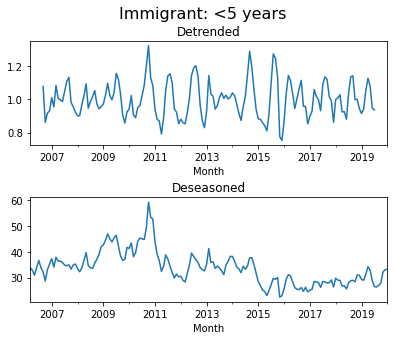

Strength of trend for  Immigrant: <5 years is: 1.000
Strength of seasonality for  Immigrant: <5 years is: 0.379 



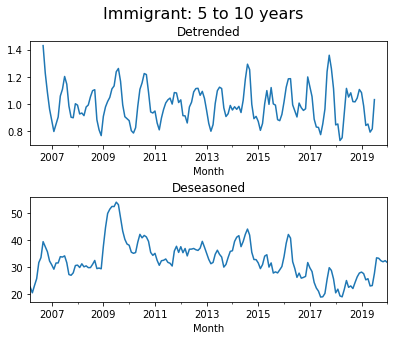

Strength of trend for  Immigrant: 5 to 10 years is: 1.000
Strength of seasonality for  Immigrant: 5 to 10 years is: 0.292 



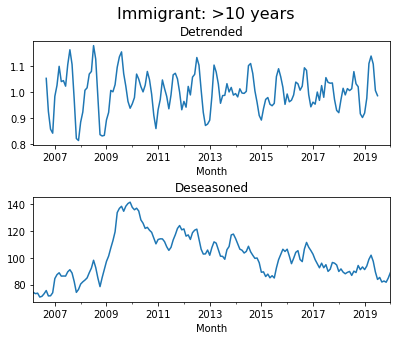

Strength of trend for  Immigrant: >10 years is: 1.000
Strength of seasonality for  Immigrant: >10 years is: 0.527 



In [77]:
#Plot detrended and deseasoned graphs for unemployment in ontario immigrants

plot_detrends(ontario_unemployment,'Immigrant: <5 years')
plot_detrends(ontario_unemployment,'Immigrant: 5 to 10 years')
plot_detrends(ontario_unemployment,'Immigrant: >10 years')

#plt.savefig("unem_DetrendSeas.png")

Strength of the trend is greater than seasonality for unemployment among immigrants immigrants in all categories in Ontario. However, the magnitude of the deseasoned plots does not vary much from the original plots. So we can conclude that the monthly unemployment averages among immigrants in Ontario is affected by seasonal variation like part-time jobs by students.

In [723]:
#Reset the figure size back to default

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

### 2-sample t-test
Above we have seen that the average unemployment is different in the three immigration categories. To test if this is significant we will do a 2 sample t-test. We hypothesize that the unemployment average in the 2 independent samples 'Immigrant<5 years' and 'Immigrant 5 to 10 years' is the same.

$H_0$ : Average unemployemnt in 'Immigrant<5 years' and 'Immigrant 5 to 10 years' is the same.. i.e average 'Immigrant<5 years' - 'Immigrant 5 to 10 years' = 0
$H_a$: Average unemployment in 'Immigrant<5 years' and 'Immigrant 5 to 10 years' is different.

The probability of obtaining a difference in the two immigrant averages is close to 16%, not very high. But at a significance level of 0.05 the p-value is more, so we fail to reject the null hypothesis 


In other words the average unemployment among immigrants<5 years and immigrant 5 to 10 years is not statistically significant.

In [80]:
stats.ttest_ind(ontario_unemployment['Immigrant: <5 years'],ontario_unemployment['Immigrant: 5 to 10 years'])

Ttest_indResult(statistic=1.4153279113961177, pvalue=0.15790969636777863)

## Canada immigrant unemployment

In [81]:
canada_data.head()

,Month,Immigration Status,Employment Status,Gender,Age,Level1,Level2,Level3,Level4,Level5,Level6,Level7,Level123,Level45,Level67,Total_levels
0,2006-03-01,Immigrant: <5 years,Full-time,Male,15-24,2.600,4.500,4.200,0.724,2.200,3.000,0.724,11.300,2.924,3.724,17.948
1,2006-03-01,Immigrant: <5 years,Full-time,Male,25-64,14.000,17.600,9.600,2.700,39.100,60.600,51.100,41.200,41.800,111.700,194.700
2,2006-03-01,Immigrant: <5 years,Full-time,Female,15-24,0.724,0.724,0.724,0.000,0.724,0.724,0.000,2.172,0.724,0.724,3.620
3,2006-03-01,Immigrant: <5 years,Full-time,Female,25-64,9.400,17.800,3.400,0.724,27.900,50.100,22.500,30.600,28.624,72.600,131.824
4,2006-03-01,Immigrant: <5 years,Part-time,Male,15-24,6.000,2.800,0.724,0.000,1.900,0.724,0.000,9.524,1.900,0.724,12.148


In [82]:
canada_data.set_index(['Month','Immigration Status','Employment Status','Gender','Age'],inplace=True)
canada_data.index.get_level_values(0).unique()

DatetimeIndex(['2006-03-01', '2006-04-01', '2006-05-01', '2006-06-01',
               '2006-07-01', '2006-08-01', '2006-09-01', '2006-10-01',
               '2006-11-01', '2006-12-01',
               ...
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
               '2020-10-01', '2020-11-01'],
              dtype='datetime64[ns]', name='Month', length=177, freq=None)

In [83]:
canada_employment = canada_data.sum(level=[0,1,2])
canada_employment.head()

Level1  Level2  \
Month      Immigration Status       Employment Status                     
2006-03-01 Immigrant: <5 years      Full-time            26.724  40.624   
                                    Part-time            13.900  11.000   
                                    Unemployed            7.524   8.748   
                                    Not in labour force  72.600  41.200   
           Immigrant: 5 to 10 years Full-time            30.824  58.900   

                                                         Level3  Level4  \
Month      Immigration Status       Employment Status                     
2006-03-01 Immigrant: <5 years      Full-time            17.924   4.148   
                                    Part-time             6.648   0.724   
                                    Unemployed            2.896   1.448   
                                    Not in labour force  17.124   2.172   
           Immigrant: 5 to 10 years Full-time            12.124   2.172   

                                                         Level5   Level6  \
Month      Immigration Status       Employment Status                      
2006-03-01 Immigrant: <5 years      Full-time            69.924  114.424   
                                    Part-time            21.300   14.248   
                                    Unemployed            9.424   14.948   
                                    Not in labour force  32.200   49.248   
           Immigrant: 5 to 10 years Full-time            87.424  107.524   

                                                         Level7  Level123  \
Month      Immigration Status       Employment Status                       
2006-03-01 Immigrant: <5 years      Full-time            74.324    85.272   
                                    Part-time            11.900    31.548   
                                    Unemployed           13.424    19.168   
                                    Not in labour force  29.624   130.924   
           Immigrant: 5 to 10 years Full-time            72.424   101.848   

                                                         Level45  Level67  \
Month      Immigration Status       Employment Status                       
2006-03-01 Immigrant: <5 years      Full-time             74.072  188.748   
                                    Part-time             22.024   26.148   
                                    Unemployed            10.872   28.372   
                                    Not in labour force   34.372   78.872   
           Immigrant: 5 to 10 years Full-time             89.596  179.948   

                                                         Total_levels  
Month      Immigration Status       Employment Status                  
2006-03-01 Immigrant: <5 years      Full-time                 348.092  
                                    Part-time                  79.720  
                                    Unemployed                 58.412  
                                    Not in labour force       244.168  
           Immigrant: 5 to 10 years Full-time                 371.392

In [84]:
#Canada unemployement df month-wise for immigrants

canada_unemployment = canada_employment.loc[idx[ : , ['Immigrant: <5 years', 'Immigrant: 5 to 10 years',\
    'Immigrant: >10 years','Born in Canada'],'Unemployed'], 'Total_levels' ].sort_index(level=0).unstack(level=1)

canada_unemployment = canada_unemployment.reset_index().set_index('Month').drop(columns='Employment Status')
canada_unemployment.head()

Immigration Status,Born in Canada,Immigrant: 5 to 10 years,Immigrant: <5 years,Immigrant: >10 years
Month,,,,
2006-03-01,902.072,44.744,58.412,141.596
2006-04-01,884.824,43.044,55.536,138.320
2006-05-01,863.172,45.192,57.136,137.348
2006-06-01,814.772,44.440,63.212,128.996
2006-07-01,815.072,55.264,72.188,131.220


In [85]:
#Create separate df for 2020 canada unemployment data for immigrants and drop 2020 data from canada_unemployment

canada_unemployment2020 = canada_unemployment.loc['Feb2020':'Nov2020'].copy()
canada_unemployment.drop(index=canada_unemployment['Feb2020':'Nov2020'].index, inplace=True)

In [86]:
canada_unemployment.stack().groupby('Immigration Status').agg(['mean','std','count'])

,mean,std,count
Immigration Status,,,
Born in Canada,917.240192,119.339903,167
Immigrant: 5 to 10 years,61.312311,10.349319,167
Immigrant: <5 years,74.170611,9.340359,167
Immigrant: >10 years,177.113796,27.027513,167


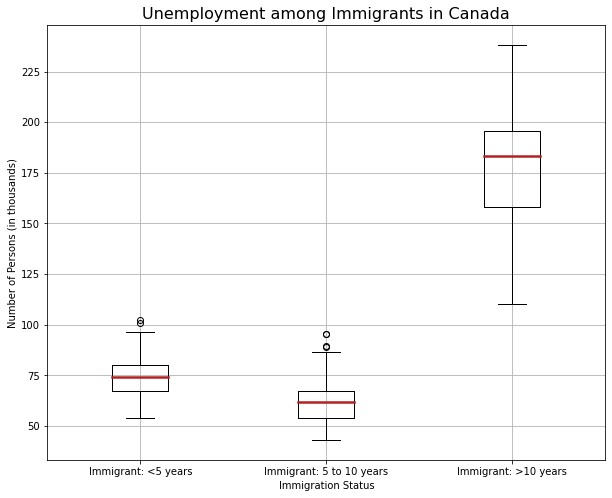

In [87]:
medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(canada_unemployment[['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years']],\
            labels=['Immigrant: <5 years','Immigrant: 5 to 10 years','Immigrant: >10 years'],
           medianprops=medianprops)
plt.xlabel("Immigration Status")
plt.ylabel("Number of Persons (in thousands)")
plt.title("Unemployment among Immigrants in Canada", fontsize=16)
plt.grid(True)
#plt.savefig('Can_ImmUnemp.png');

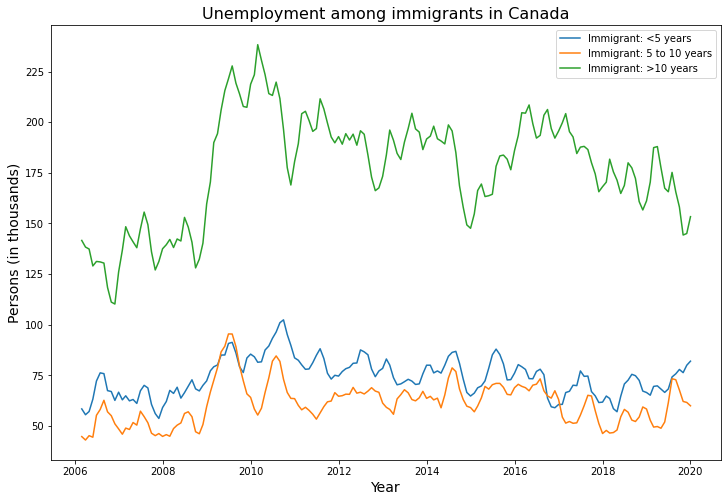

In [88]:
line_plot(canada_unemployment,['Immigrant: <5 years', 'Immigrant: 5 to 10 years', 'Immigrant: >10 years'],
         "Unemployment among immigrants in Canada","Year","Persons (in thousands)")

#plt.savefig('CatimeSe_ImUnemp.png');

### ANOVA test: Test if unemployment averages is significantly different across immigration groups in Canada. 

$H_0$ : Average unemployment is same across all immigrant groups.
$H_a$: At least one group has different mean

Average people unemployed is almost same between immigrants < 5 years and immigrants between 5 to 10 years, but high in immigrants > 10 years. The average and the data variability is high for the immigrant group > 10 years.We will use anova testing to see if the unemployment averages between different immigrant groups is statistically significant at 0.05. 

We have a high F-value and a very small p-value. Therefore we reject the null hypothesis and conclude that unemployment average  is different in atleast one immigrant group. We find the pairs that have different averages using MultiComparison.allpairtest with Bonferroni correction.
Unlike Ontario, the average unemployment between all the immigrant groups are statistifically significant. In Ontario the average unemployment between immigrant groups < 5 years and between 5 to 10 years is comparable and not statistically significant.

In [89]:
stats.f_oneway(canada_unemployment['Immigrant: <5 years'], canada_unemployment['Immigrant: 5 to 10 years'], 
               canada_unemployment['Immigrant: >10 years'])

F_onewayResult(statistic=2182.45307263266, pvalue=3.7413669706886574e-247)

In [90]:
# Stack and drop 'Born in Canada' data to use in MultiComparison to find the group that is different

ca_unemp = canada_unemployment.stack().to_frame().drop('Born in Canada', level=1).reset_index().\
rename(columns={0:'Total_levels'})

ca_unemp.head()

,Month,Immigration Status,Total_levels
0,2006-03-01,Immigrant: 5 to 10 years,44.744
1,2006-03-01,Immigrant: <5 years,58.412
2,2006-03-01,Immigrant: >10 years,141.596
3,2006-04-01,Immigrant: 5 to 10 years,43.044
4,2006-04-01,Immigrant: <5 years,55.536


In [91]:
comparisons = mc.MultiComparison(ca_unemp['Total_levels'], ca_unemp['Immigration Status'])
table1, a3, a4 = comparisons.allpairtest(stats.ttest_ind, method='bonf')
table1

group1,group2,stat,pval,pval_corr,reject
Immigrant: 5 to 10 years,Immigrant: <5 years,-11.9192,0.0,0.0,True
Immigrant: 5 to 10 years,Immigrant: >10 years,-51.7077,0.0,0.0,True
Immigrant: <5 years,Immigrant: >10 years,-46.5212,0.0,0.0,True


# Ontario unemployment in different education levels for age group 25-64

#### ontario_edu_unemp: Dataframe with total, unemployed, % unemployed in each education level for ages 25-64

In [92]:
ontario_data.head()

Level1  Level2  \
Month      Immigration Status  Employment Status Gender Age                     
2006-03-01 Immigrant: <5 years Full-time         Male   15-24   0.724   3.200   
                                                        25-64   7.000  10.600   
                                                 Female 15-24   0.724   0.724   
                                                        25-64   3.600  11.900   
                               Part-time         Male   15-24   3.600   2.200   

                                                               Level3  Level4  \
Month      Immigration Status  Employment Status Gender Age                     
2006-03-01 Immigrant: <5 years Full-time         Male   15-24   3.100   0.000   
                                                        25-64   4.700   2.000   
                                                 Female 15-24   0.000   0.000   
                                                        25-64   0.724   0.724   
                               Part-time         Male   15-24   0.724   0.000   

                                                               Level5  Level6  \
Month      Immigration Status  Employment Status Gender Age                     
2006-03-01 Immigrant: <5 years Full-time         Male   15-24     1.7   2.300   
                                                        25-64    18.8  34.700   
                                                 Female 15-24     0.0   0.724   
                                                        25-64    14.0  27.700   
                               Part-time         Male   15-24     1.7   0.724   

                                                               Level7  \
Month      Immigration Status  Employment Status Gender Age             
2006-03-01 Immigrant: <5 years Full-time         Male   15-24   0.724   
                                                        25-64  29.500   
                                                 Female 15-24   0.000   
                                                        25-64  16.800   
                               Part-time         Male   15-24   0.000   

                                                               Level123  \
Month      Immigration Status  Employment Status Gender Age               
2006-03-01 Immigrant: <5 years Full-time         Male   15-24     7.024   
                                                        25-64    22.300   
                                                 Female 15-24     1.448   
                                                        25-64    16.224   
                               Part-time         Male   15-24     6.524   

                                                               Level45  \
Month      Immigration Status  Employment Status Gender Age              
2006-03-01 Immigrant: <5 years Full-time         Male   15-24    1.700   
                                                        25-64   20.800   
                                                 Female 15-24    0.000   
                                                        25-64   14.724   
                               Part-time         Male   15-24    1.700   

                                                               Level67  \
Month      Immigration Status  Employment Status Gender Age              
2006-03-01 Immigrant: <5 years Full-time         Male   15-24    3.024   
                                                        25-64   64.200   
                                                 Female 15-24    0.724   
                                                        25-64   44.500   
                               Part-time         Male   15-24    0.724   

                                                               Total_levels  
Month      Immigration Status  Employment Status Gender Age                  
2006-03-01 Immigrant: <5 years Full-time         Male   15-24        11.748  
                                                 

In [93]:
#Ontario month-wise total population in age group 25-64 for levels 123, 45, and level67

ontario_poplevel = ontario_data.sum(level=[0,4])[['Level123','Level45','Level67']].drop('15-24', level=1)\
.reset_index().drop(columns='Age').\
set_index('Month').rename(columns={'Level123':'Pop_level123','Level45':'Pop_level45','Level67':'Pop_level67'})

#Remove Feb 2020 to Nov 2020 data from the above dataframe to a separate df
ontario_poplevel2020 = ontario_poplevel.loc['2020-02-01':'2020-11-01'].copy()

ontario_poplevel.drop(index=ontario_poplevel.loc['2020-02-01':'2020-11-01'].index, inplace=True)

In [94]:
ontario_poplevel.head()

,Pop_level123,Pop_level45,Pop_level67
Month,,,
2006-03-01,2783.416,2272.880,1839.212
2006-04-01,2767.340,2307.904,1823.560
2006-05-01,2752.192,2335.180,1818.060
2006-06-01,2753.740,2335.808,1819.560
2006-07-01,2753.968,2333.356,1838.988


In [95]:
#Month-wise unemployed people for ages 25-64 for levels123, 45,and level67

ontario_unemplevel = ontario_data.sum(level=[0,2,4])[['Level123','Level45','Level67']].\
drop(['Full-time','Part-time','Not in labour force'], level=1).drop(['15-24'], level=2).reset_index().\
drop(columns=['Employment Status','Age']).set_index('Month')\
.rename(columns={'Level123':'Unemp_level123','Level45':'Unemp_level45','Level67':'Unemp_level67'})

#Remove Feb 2020 to Nov 2020 data from the above dataframe to a separate df

ontario_unemplevel2020 = ontario_unemplevel.loc['2020-02-01':'2020-11-01'].copy()

ontario_unemplevel.drop(index=ontario_unemplevel.loc['2020-02-01':'2020-11-01'].index, inplace=True)

In [96]:
#Merge the above two dataframes and calculate %unemployed in each level

ontario_edu_unemp = pd.merge(ontario_poplevel, ontario_unemplevel, on='Month',how='inner' )
ontario_edu_unemp.head()

,Pop_level123,Pop_level45,Pop_level67,Unemp_level123,Unemp_level45,Unemp_level67
Month,,,,,,
2006-03-01,2783.416,2272.880,1839.212,148.184,89.296,63.868
2006-04-01,2767.340,2307.904,1823.560,146.384,84.368,62.968
2006-05-01,2752.192,2335.180,1818.060,139.636,80.744,61.220
2006-06-01,2753.740,2335.808,1819.560,132.888,76.844,59.120
2006-07-01,2753.968,2333.356,1838.988,133.312,84.892,63.920


In [97]:
# Merge the two dataframes for 2020

ontario_edu_unemp2020 = pd.merge(ontario_poplevel2020, ontario_unemplevel2020, on='Month',how='inner' )
ontario_edu_unemp2020.head()

,Pop_level123,Pop_level45,Pop_level67,Unemp_level123,Unemp_level45,Unemp_level67
Month,,,,,,
2020-02-01,2283.244,2635.084,2999.668,96.612,90.272,102.820
2020-03-01,2289.568,2617.832,3020.296,109.884,110.396,129.072
2020-04-01,2323.220,2600.980,3014.220,140.636,148.920,155.972
2020-05-01,2337.196,2584.584,3020.544,190.564,191.796,187.872
2020-06-01,2343.048,2574.008,3031.844,207.888,209.372,201.172


In [98]:
#Calculate unemployment % in each level

ontario_edu_unemp['level123%'] = (ontario_edu_unemp['Unemp_level123']*100/ ontario_edu_unemp['Pop_level123']).round(3)
ontario_edu_unemp['level45%'] = (ontario_edu_unemp['Unemp_level45']*100/ ontario_edu_unemp['Pop_level45']).round(3)
ontario_edu_unemp['level67%'] = (ontario_edu_unemp['Unemp_level67']*100/ ontario_edu_unemp['Pop_level67']).round(3)

In [99]:
#Calculate unemployment % in each level for 2020 data

ontario_edu_unemp2020['level123%'] = (ontario_edu_unemp2020['Unemp_level123']*100/ ontario_edu_unemp2020['Pop_level123']).round(3)
ontario_edu_unemp2020['level45%'] = (ontario_edu_unemp2020['Unemp_level45']*100/ ontario_edu_unemp2020['Pop_level45']).round(3)
ontario_edu_unemp2020['level67%'] = (ontario_edu_unemp2020['Unemp_level67']*100/ ontario_edu_unemp2020['Pop_level67']).round(3)

In [100]:
ontario_edu_unemp.describe()

,Pop_level123,Pop_level45,Pop_level67,Unemp_level123,Unemp_level45,Unemp_level67,level123%,level45%,level67%
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,2545.770491,2499.528479,2311.663593,137.884575,110.979593,94.933054,5.394467,4.445317,4.128509
std,117.697254,79.817301,311.190823,29.323334,20.815356,16.853957,1.012241,0.852308,0.689497
min,2288.348000,2272.880000,1818.060000,83.380000,76.844000,59.020000,3.500000,3.055000,3.000000
25%,2454.554000,2456.058000,2059.592000,117.650000,94.556000,87.008000,4.641500,3.827500,3.524500
50%,2554.040000,2510.204000,2312.444000,136.888000,106.216000,96.448000,5.316000,4.255000,4.067000
75%,2649.944000,2545.460000,2588.156000,153.990000,124.106000,105.334000,6.043500,4.910000,4.558000
max,2783.416000,2658.364000,2974.068000,212.940000,169.072000,135.372000,7.985000,6.802000,6.053000


In [101]:
ontario_edu_unemp2020.describe()

,Pop_level123,Pop_level45,Pop_level67,Unemp_level123,Unemp_level45,Unemp_level67,level123%,level45%,level67%
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2313.30720,2575.470400,3058.435200,163.298800,153.990800,176.542000,7.048300,5.987400,5.764800
std,20.84166,33.553096,47.779777,38.350559,39.752723,37.912691,1.609995,1.565223,1.208014
min,2283.24400,2540.356000,2999.668000,96.612000,90.272000,102.820000,4.231000,3.426000,3.428000
25%,2295.50700,2546.252000,3020.358000,142.781000,127.570000,158.385000,6.165750,5.021500,5.204000
50%,2316.96200,2566.684000,3049.382000,173.066000,149.532000,187.160000,7.504500,5.816500,6.096500
75%,2328.00200,2596.881000,3096.689000,190.052000,188.940000,204.322000,8.146250,7.327750,6.630500
max,2343.04800,2635.084000,3130.024000,207.888000,209.372000,216.096000,8.873000,8.134000,7.027000


In [102]:
ontario_edu_unemp.corr()

,Pop_level123,Pop_level45,Pop_level67,Unemp_level123,Unemp_level45,Unemp_level67,level123%,level45%,level67%
Pop_level123,1.000000,-0.880151,-0.965379,0.611485,0.352218,-0.446583,0.468415,0.471577,0.245418
Pop_level45,-0.880151,1.000000,0.860280,-0.366643,-0.051797,0.509384,-0.222675,-0.195923,-0.082732
Pop_level67,-0.965379,0.860280,1.000000,-0.618142,-0.363400,0.475606,-0.486936,-0.478317,-0.236195
Unemp_level123,0.611485,-0.366643,-0.618142,1.000000,0.891653,0.078830,0.984912,0.928956,0.588261
Unemp_level45,0.352218,-0.051797,-0.363400,0.891653,1.000000,0.346384,0.918662,0.989187,0.692538
Unemp_level67,-0.446583,0.509384,0.475606,0.078830,0.346384,1.000000,0.179678,0.268943,0.737111
level123%,0.468415,-0.222675,-0.486936,0.984912,0.918662,0.179678,1.000000,0.934421,0.601093
level45%,0.471577,-0.195923,-0.478317,0.928956,0.989187,0.268943,0.934421,1.000000,0.693338
level67%,0.245418,-0.082732,-0.236195,0.588261,0.692538,0.737111,0.601093,0.693338,1.000000


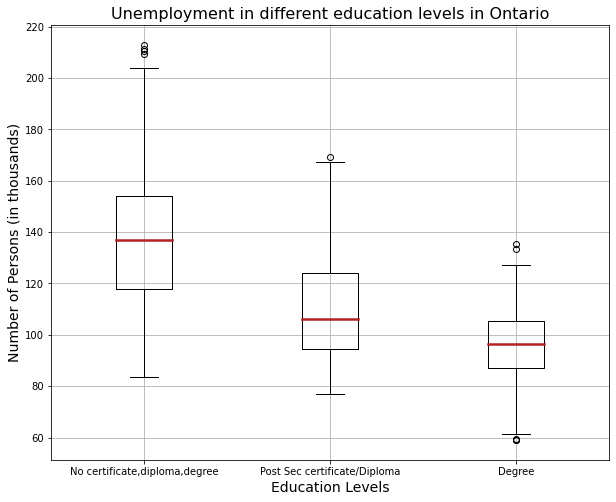

In [103]:
medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(ontario_edu_unemp[['Unemp_level123','Unemp_level45','Unemp_level67']],\
            labels=['No certificate,diploma,degree','Post Sec certificate/Diploma','Degree'],
           medianprops=medianprops)
plt.xlabel("Education Levels", fontsize=14)
plt.ylabel("Number of Persons (in thousands)", fontsize=14)
plt.title("Unemployment in different education levels in Ontario", fontsize=16)
plt.grid(True);


#plt.savefig('ONunemp_edu.png');

In [1228]:
#Tests for equal variances, that all samples are from populations with equal variances. One of the data assumptions
#for performing anova

#stats.levene(ontario_edu_unemp['level123%'],ontario_edu_unemp['level45%'],ontario_edu_unemp['level67%'])

LeveneResult(statistic=9.890568178787868, pvalue=6.1333323027277e-05)

### Anova test: We are interested to see if  unemployment is significantly different across differet education levels in Ontario for age group 25-64.

$H_0$ : Average unemployment is same across the three education levels.
$H_a$: At least one group has a different average.

Average people unemployed is comparable between level45 and level67, but high in level123. On comparing the difference in averages in the 3 samples with the data variablity using anova test we get a high F-value and a very small p-value. This suggests our null hypothesis to be false and statistically significant at 0.05. Therefore we reject the null hypothesis and conclude that unemployment averages are different between atleast one pair. Using MultiComparison.allpairtest with Bonferroni correction we find that average unemployment is different between all education levels in Ontario.

Unemployment averages in different education levels for age group 25-64 in Ontario is statistically significant at 0.05

In [104]:
stats.f_oneway(ontario_edu_unemp['Unemp_level123'],ontario_edu_unemp['Unemp_level45'],ontario_edu_unemp['Unemp_level67'])

F_onewayResult(statistic=149.62528153927315, pvalue=1.2971569298725021e-51)

In [105]:
stats.f_oneway(ontario_edu_unemp['level123%'],ontario_edu_unemp['level45%'],ontario_edu_unemp['level67%'])

F_onewayResult(statistic=97.6550908453456, pvalue=1.6563014911009927e-36)

In [106]:
on_ed_unemp = ontario_edu_unemp[['Unemp_level123','Unemp_level45','Unemp_level67']].copy()
on_ed_unemp = on_ed_unemp.stack().to_frame().reset_index().rename(columns={'level_1':'Edlevel_unemp',0:'Population'})
on_ed_unemp.head()

,Month,Edlevel_unemp,Population
0,2006-03-01,Unemp_level123,148.184
1,2006-03-01,Unemp_level45,89.296
2,2006-03-01,Unemp_level67,63.868
3,2006-04-01,Unemp_level123,146.384
4,2006-04-01,Unemp_level45,84.368


In [107]:
#Compare using Bonferroni method

comparisons = mc.MultiComparison(on_ed_unemp['Population'],on_ed_unemp['Edlevel_unemp'])
table1, b1, b2 = comparisons.allpairtest(stats.ttest_ind, method='bonf')
table1

group1,group2,stat,pval,pval_corr,reject
Unemp_level123,Unemp_level45,9.6687,0.0,0.0,True
Unemp_level123,Unemp_level67,16.4112,0.0,0.0,True
Unemp_level45,Unemp_level67,7.7425,0.0,0.0,True


### Anova for covid data Feb2020 to Nov2020

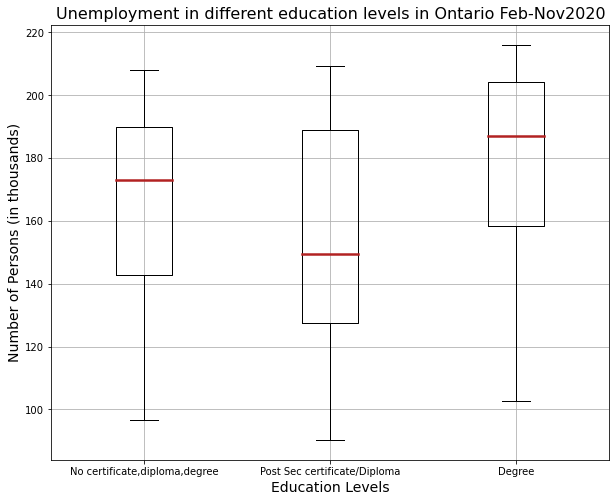

In [108]:
medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(ontario_edu_unemp2020[['Unemp_level123','Unemp_level45','Unemp_level67']],\
            labels=['No certificate,diploma,degree','Post Sec certificate/Diploma','Degree'],
           medianprops=medianprops)
plt.xlabel("Education Levels", fontsize=14)
plt.ylabel("Number of Persons (in thousands)", fontsize=14)
plt.title("Unemployment in different education levels in Ontario Feb-Nov2020", fontsize=16)
plt.grid(True)
#plt.savefig('ONunemp_eduCovid.png');

In [109]:
# Difference in unemployment averages during covid

stats.f_oneway(ontario_edu_unemp2020['Unemp_level123'],ontario_edu_unemp2020['Unemp_level45'],ontario_edu_unemp2020['Unemp_level67'])

F_onewayResult(statistic=0.8584072285617148, pvalue=0.4350821610708206)

In [110]:
on_ed_unemp2020 = ontario_edu_unemp2020[['Unemp_level123','Unemp_level45','Unemp_level67']].copy()
on_ed_unemp2020 = on_ed_unemp2020.stack().to_frame().reset_index().rename(columns={'level_1':'Edlevel_unemp',0:'Population'})
on_ed_unemp2020.head()

,Month,Edlevel_unemp,Population
0,2020-02-01,Unemp_level123,96.612
1,2020-02-01,Unemp_level45,90.272
2,2020-02-01,Unemp_level67,102.820
3,2020-03-01,Unemp_level123,109.884
4,2020-03-01,Unemp_level45,110.396


In [111]:
comparisons = mc.MultiComparison(on_ed_unemp2020['Population'],on_ed_unemp2020['Edlevel_unemp'])
table2, b3, b4 = comparisons.allpairtest(stats.ttest_ind, method='bonf')
table2

group1,group2,stat,pval,pval_corr,reject
Unemp_level123,Unemp_level45,0.5329,0.6006,1.0,False
Unemp_level123,Unemp_level67,-0.7766,0.4475,1.0,False
Unemp_level45,Unemp_level67,-1.2982,0.2106,0.6318,False


### Times series of population and unemployment of different education levels in Ontario

In [999]:
# Plot time series education level population in Ontario

#line_plot(ontario_edu_unemp,['Pop_level123', 'Pop_level45', 'Pop_level67'],
         #"Population for education levels in Ontario","Year","Persons (in thousands)")

#plt.savefig('ONtimeSe_popEduLevels.png');

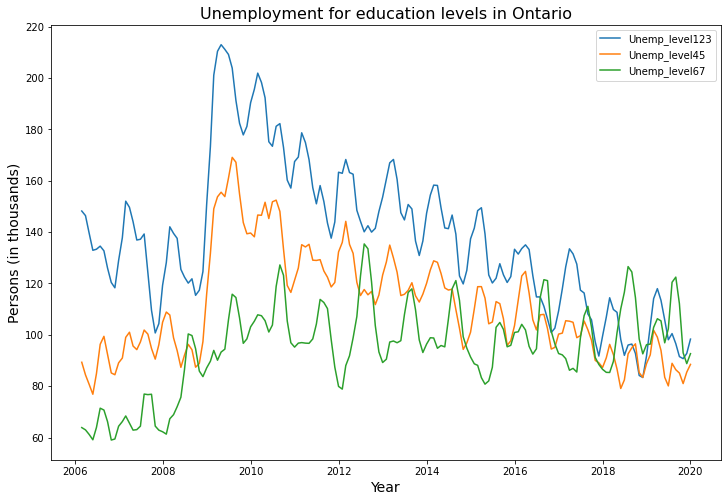

In [113]:
# Plot time series education level unemployment in Ontario

line_plot(ontario_edu_unemp,['Unemp_level123', 'Unemp_level45', 'Unemp_level67'],
         "Unemployment for education levels in Ontario","Year","Persons (in thousands)")

#plt.savefig('ONtimeSe_UnempEduLevels.png');

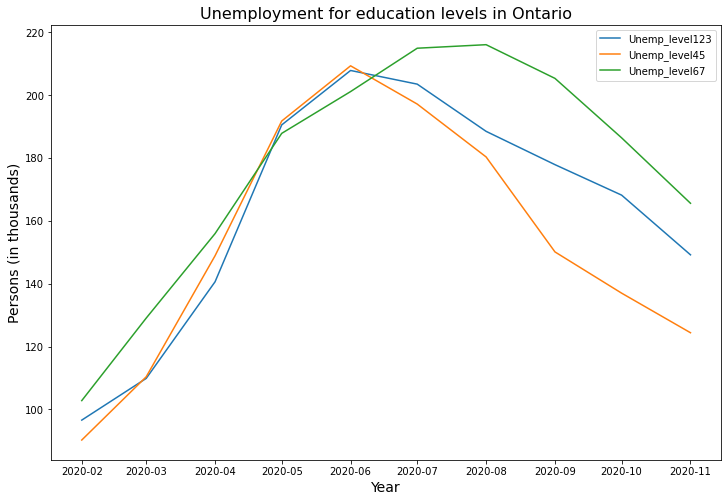

In [114]:
# Plot time series education level unemployment in Ontario for 2020

line_plot(ontario_edu_unemp2020,['Unemp_level123', 'Unemp_level45', 'Unemp_level67'],
         "Unemployment for education levels in Ontario","Year","Persons (in thousands)")

#plt.savefig('ONtimeSe_UnempEduLevels2020.png');

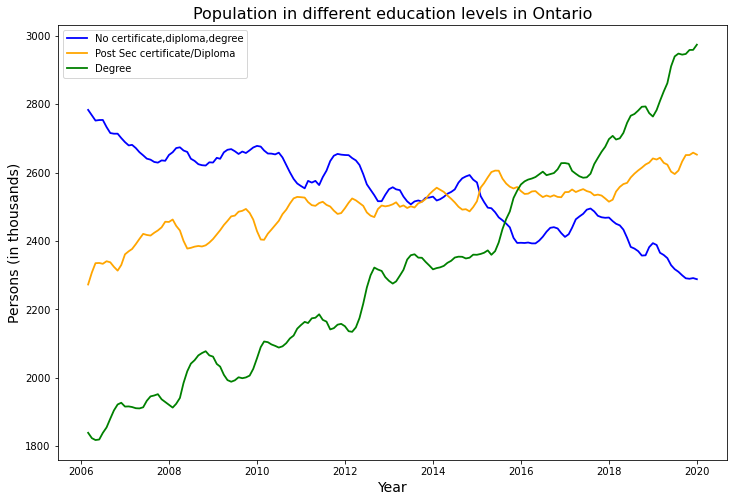

In [115]:

#Plot population and unemployment in each education le

plt.figure(figsize=(12,8))

sns.lineplot(x=ontario_edu_unemp.index, y=ontario_edu_unemp['Pop_level123'],color='blue', linewidth=1.8,
            label='No certificate,diploma,degree')
#sns.lineplot(x=ontario_edu_unemp.index, y=ontario_edu_unemp['Unemp_level123'], label='No certificate,diploma,degree',
            #color='blue', linewidth=1.8)

sns.lineplot(x=ontario_edu_unemp.index, y=ontario_edu_unemp['Pop_level45'], color='orange', linewidth=1.8,
            label='Post Sec certificate/Diploma')
#sns.lineplot(x=ontario_edu_unemp.index, y=ontario_edu_unemp['Unemp_level45'], label='Post Sec certificate/Diploma',
            #color='orange', linewidth=1.8)

sns.lineplot(x=ontario_edu_unemp.index, y=ontario_edu_unemp['Pop_level67'], color='green', linewidth=1.8,
            label='Degree')
#sns.lineplot(x=ontario_edu_unemp.index, y=ontario_edu_unemp['Unemp_level67'], label='Degree',color='green',
             #linewidth=1.8)

#plt.title("Population & unemployment in different education levels in Ontario", fontsize=16)
plt.title("Population in different education levels in Ontario", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Persons (in thousands)", fontsize=14)
plt.legend();

#plt.savefig('ONtimeSe_popEdLevel.png');

### Autocorrelation analysis

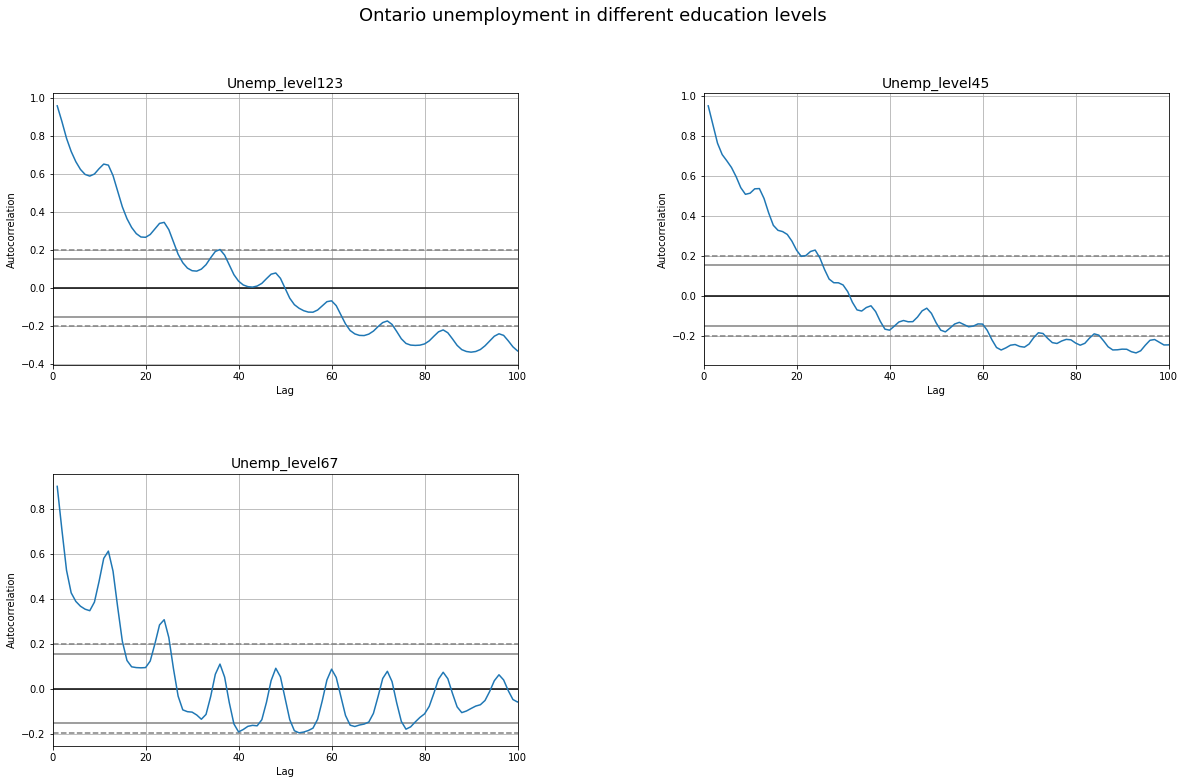

In [117]:
#Plot autocorrelation plots for unemployment among immigrants

plot_autocorr(ontario_edu_unemp[['Unemp_level123','Unemp_level45','Unemp_level67']],2,2)
plt.suptitle("Ontario unemployment in different education levels", fontsize=18)

#plt.savefig("OunempEdulevel_autocorr.png")

In [1194]:
#plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

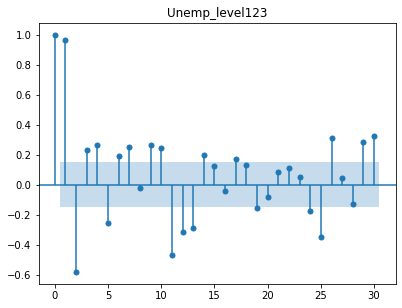

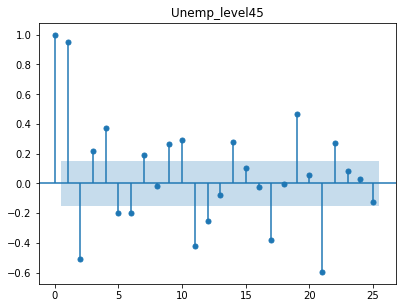

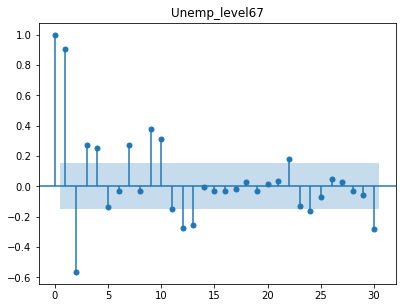

In [118]:
#Partical autocorrelation plots

tsaplots.plot_pacf(ontario_edu_unemp['Unemp_level123'], lags=30, title='Unemp_level123')
tsaplots.plot_pacf(ontario_edu_unemp['Unemp_level45'], lags=25, title='Unemp_level45')
tsaplots.plot_pacf(ontario_edu_unemp['Unemp_level67'], lags=30, title='Unemp_level67');

#plt.savefig("OunempEdulevel_partAutocorr.png")

#### Analysis:

From the autocorrelation plots we see that for unemployment in level123 a significant positive autocorrelation exists upto lag corresponding to 24 months and negative autocorrelation from the 75th month, i.e from mid year 2012. For level45 positive autocorrelation exists for the first 20 months, i.e. Mar 2006 to November 2007. For level67 positive autocorrelation exists upto a lag of 12 months, i.e from March 2006 to March 2007 and again in the 21st and 22nd  month.

The partial autocorrelation plot for level123 suggest a positive correlation every two consecutive months and an alternating negative autocorrelation. For level45, partial autocorrelations are somewhat similar as level123. For level67, postive correlation exists for 1,3,4,7,9,10th months and negative correlation for  2,12,13 months.

### Decomposition

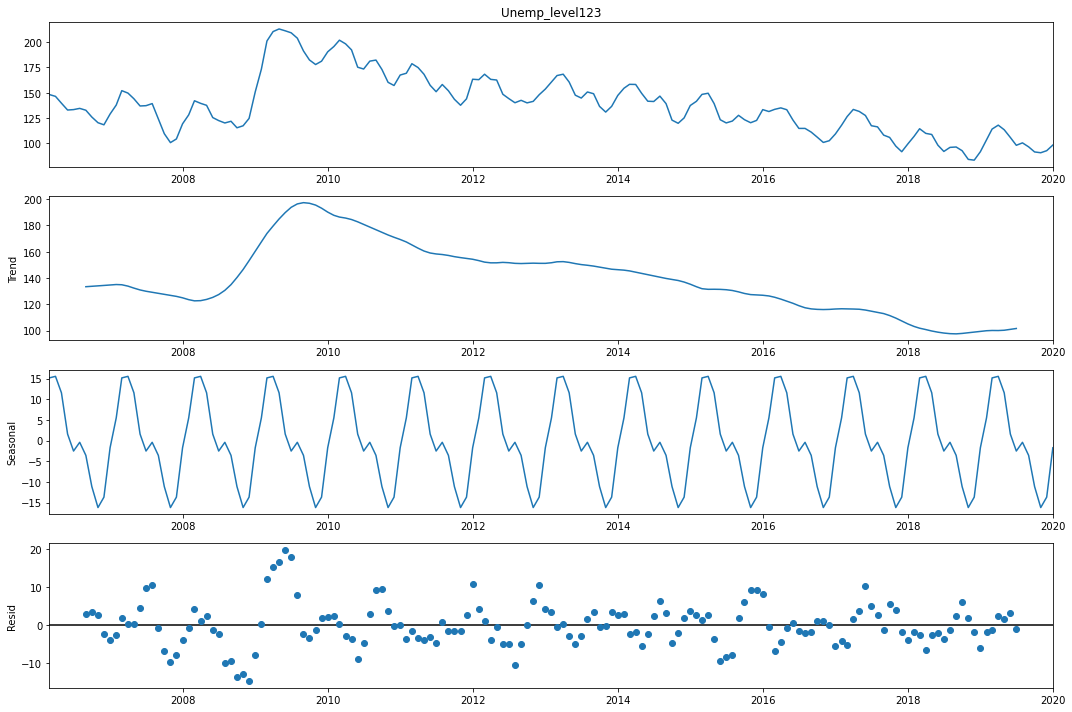

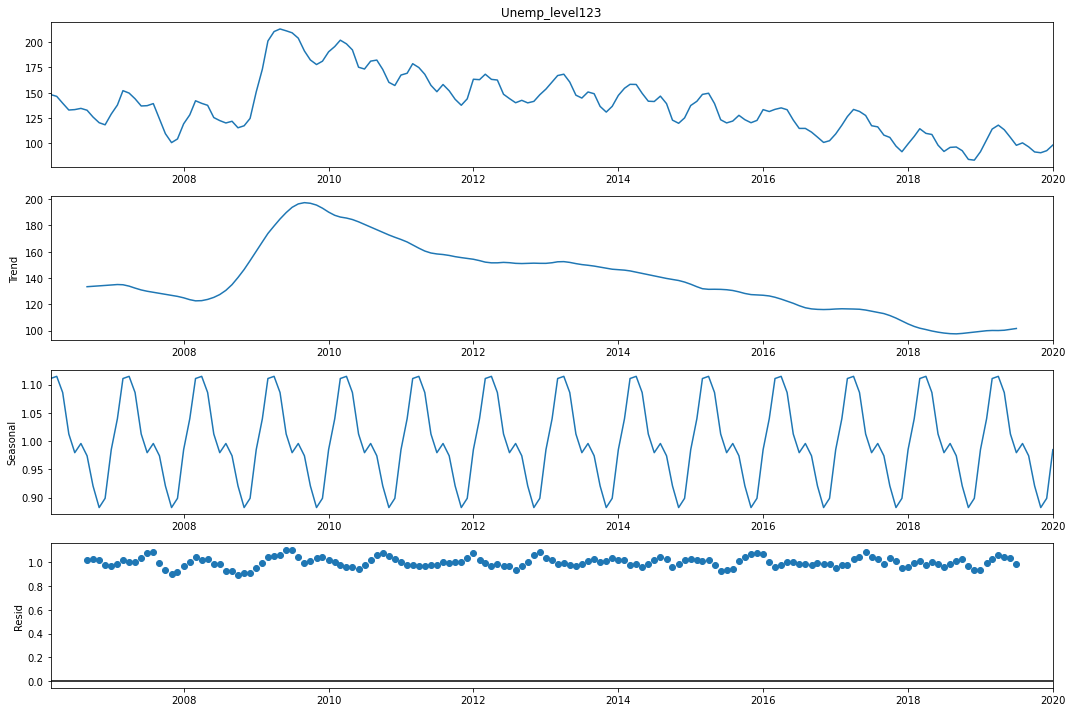

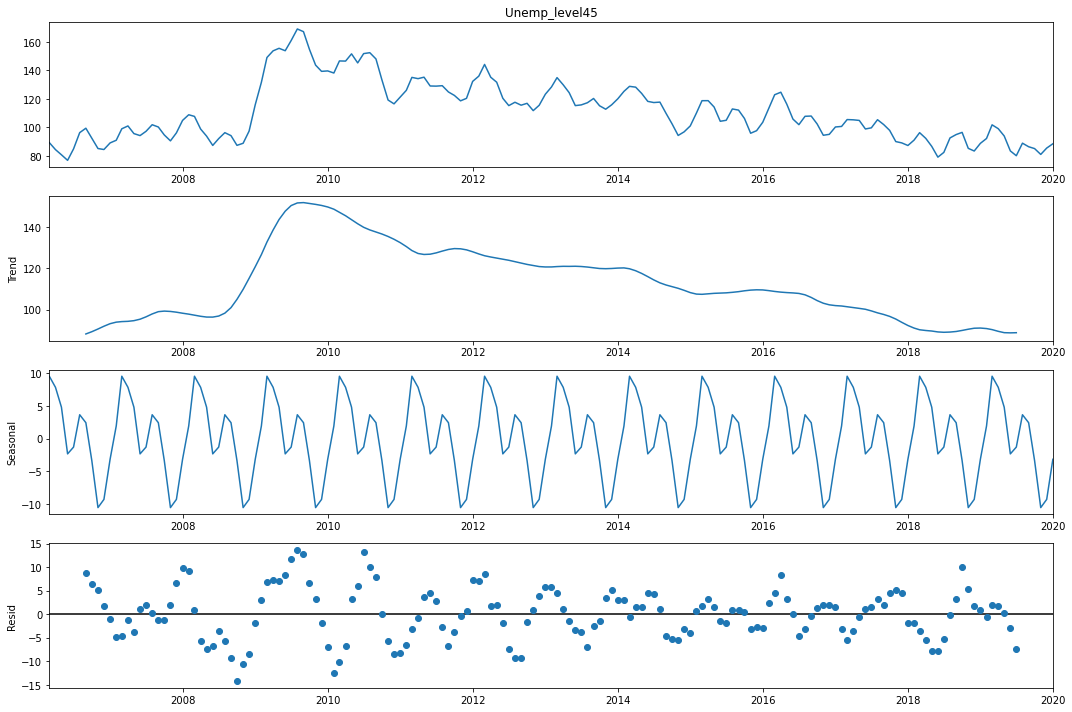

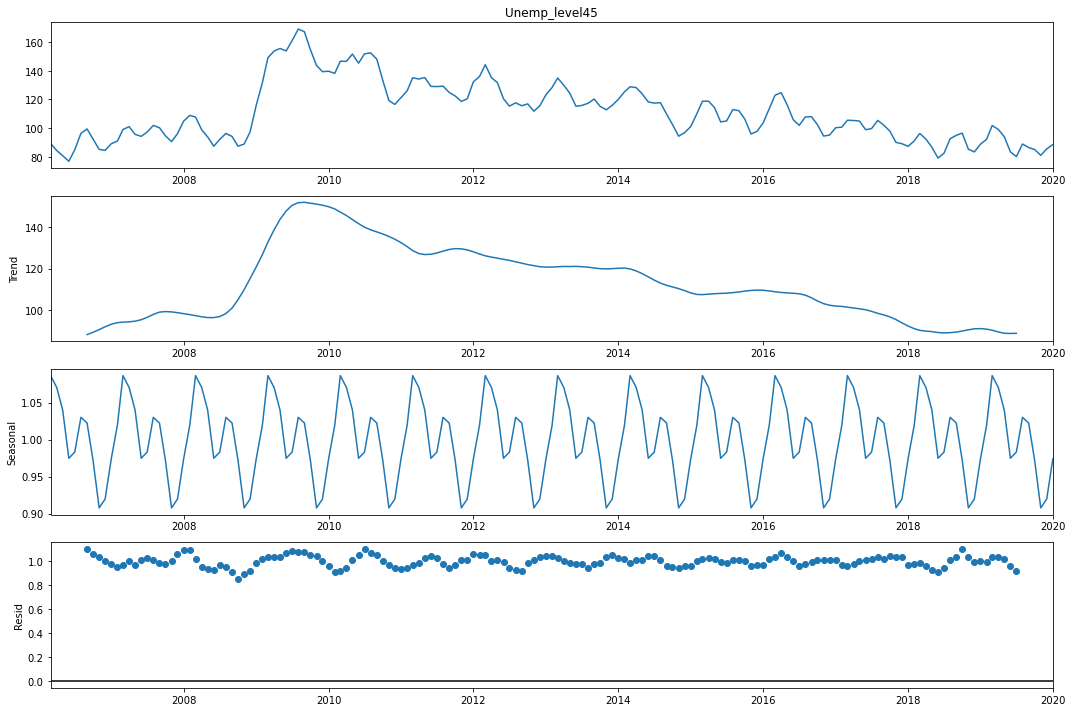

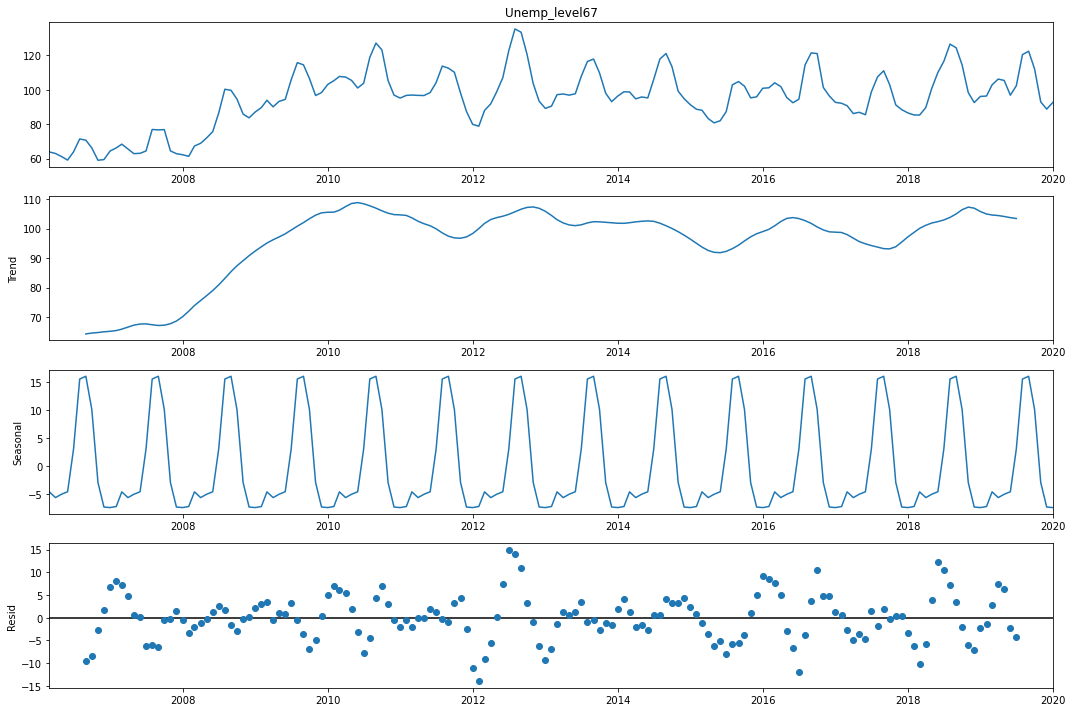

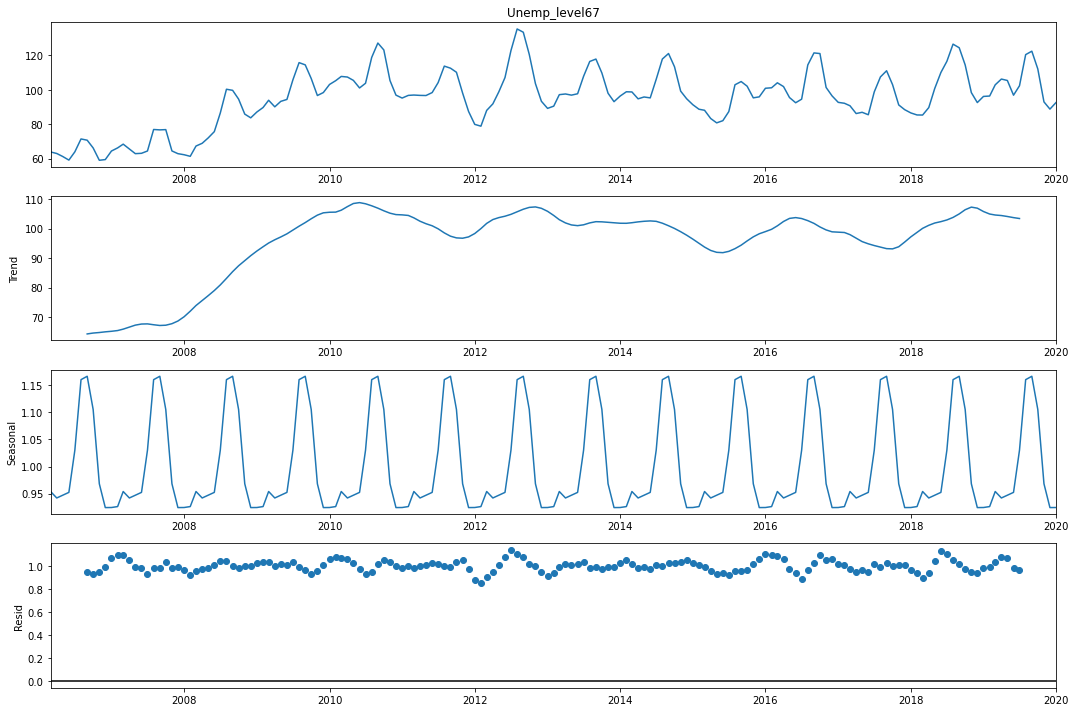

In [119]:
# Plot additive and mutiplicative seasonal decomposition for Ontario immigrant groups

plot_seasoncalDeco(ontario_edu_unemp[['Unemp_level123','Unemp_level45','Unemp_level67']])

#plt.savefig("OunempEdulevel_SeasDecompose.png")

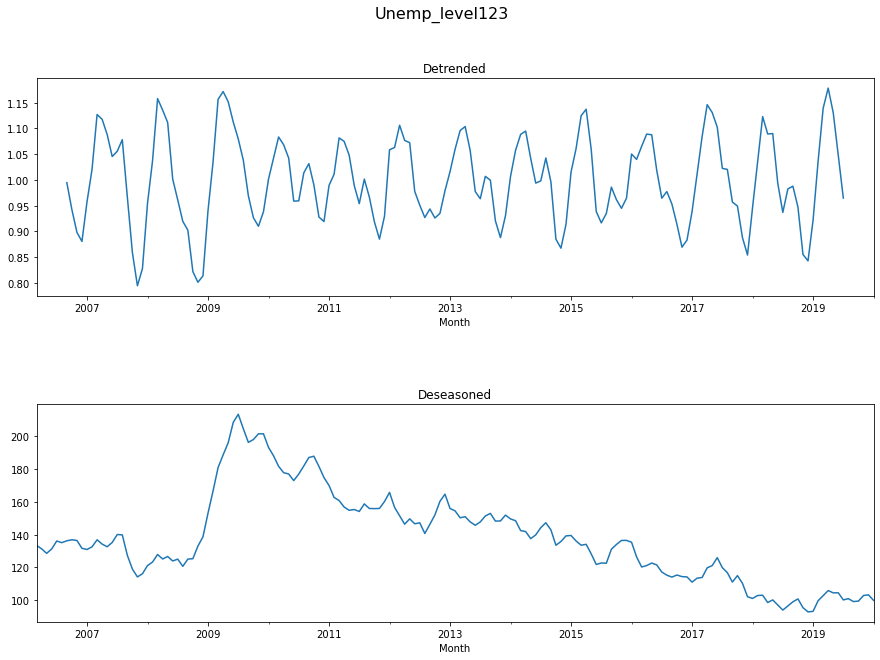

Strength of trend for  Unemp_level123 is: 1.000
Strength of seasonality for  Unemp_level123 is: 0.763 



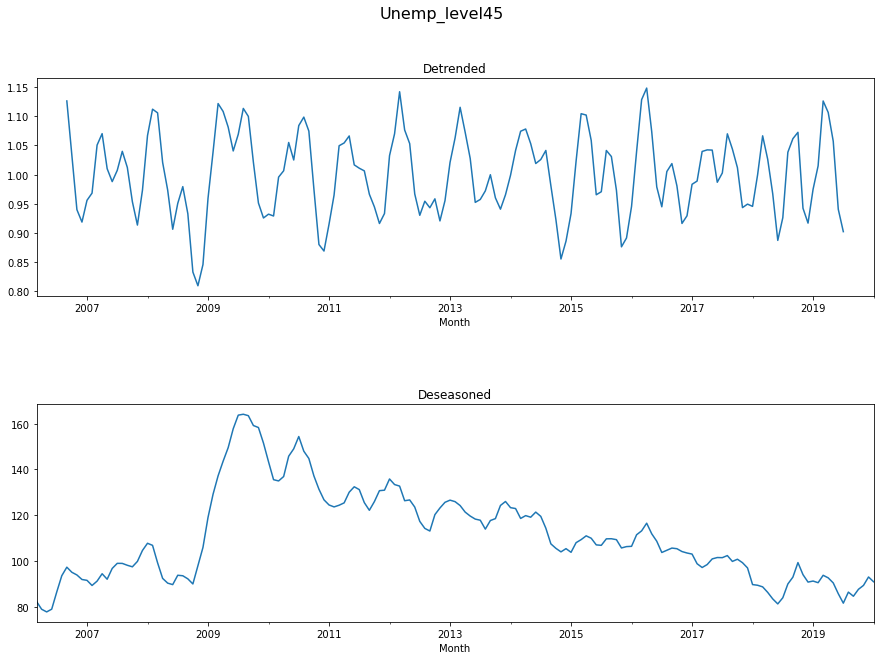

Strength of trend for  Unemp_level45 is: 1.000
Strength of seasonality for  Unemp_level45 is: 0.568 



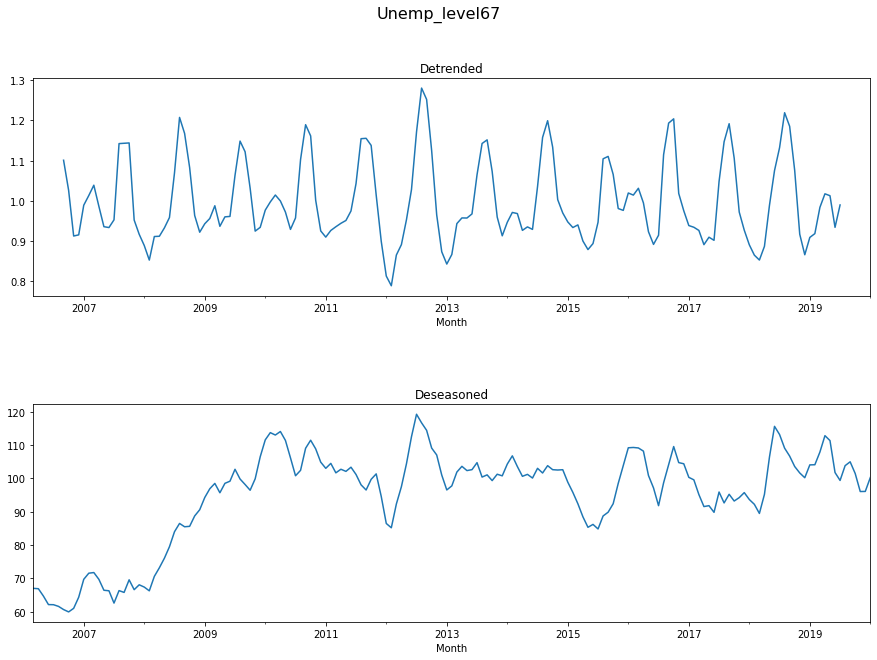

Strength of trend for  Unemp_level67 is: 1.000
Strength of seasonality for  Unemp_level67 is: 0.749 



In [120]:
#Plot detrended and deseasoned graphs for unemployment in ontario immigrants using multipicative model

plot_detrends(ontario_edu_unemp,'Unemp_level123')
plot_detrends(ontario_edu_unemp,'Unemp_level45')
plot_detrends(ontario_edu_unemp,'Unemp_level67')

#plt.savefig("OunempEdulevel_DetrendSeas.png")

#### Analysis:

Strength of the trend is greater than seasonality for unemployment among different education levels (age group 25-64) in Ontario. However, the magnitude of the deseasoned plots  are very similar to the original signals. What does this mean?
Strength of trend is different for different population education levels.

## Ontario full-time employment & unemployment in male & female population for             age group 25-64

#### ontario_gender_unemp : Dataframe with population, full-time employed, unemployed, and unemployed percentages for male and female in the age group 25-64 in Ontario

In [152]:
#Ontario gender-wise total population in age category 25-64

on_genderpop = ontario_data.sum(level=[0,3,4])['Total_levels'].drop(['15-24'], level=2).reset_index().drop(columns='Age').\
set_index(['Month','Gender']).unstack().droplevel(level=0, axis=1).\
rename(columns={'Female':'Female_pop','Male':'Male_pop'})

on_genderpop2020 = on_genderpop.loc['2020-02-01':'2020-11-01'].copy()
on_genderpop.drop(index=on_genderpop.loc['2020-02-01':'2020-11-01'].index, inplace=True)

on_genderpop

Gender,Female_pop,Male_pop
Month,,
2006-03-01,3470.096,3425.412
2006-04-01,3473.420,3425.384
2006-05-01,3479.000,3426.432
2006-06-01,3482.224,3426.884
2006-07-01,3489.700,3436.612
...,...,...
2019-09-01,4000.172,3877.120
2019-10-01,4003.952,3885.300
2019-11-01,4010.704,3889.004


In [153]:
# Ontario full-time & unemployed male and female in age category 25-64

on_genderemp = ontario_data.sum(level=[0,2,3,4])['Total_levels'].drop(['Part-time','Not in labour force'],level=1).\
drop(['15-24'],level=3).reset_index().drop(columns='Age').set_index(['Month','Gender','Employment Status']).\
unstack(level=[1,2]).droplevel(level=0, axis=1)

on_genderemp.columns = on_genderemp.columns.map('_'.join)

on_genderemp2020 = on_genderemp.loc['2020-02-01':'2020-11-01'].copy()
on_genderemp.drop(index=on_genderemp.loc['2020-02-01':'2020-11-01'].index, inplace=True)

on_genderemp

,Male_Full-time,Female_Full-time,Male_Unemployed,Female_Unemployed
Month,,,,
2006-03-01,2634.148,1998.648,172.636,128.712
2006-04-01,2656.924,2001.848,164.532,129.188
2006-05-01,2685.248,2021.372,155.084,126.516
2006-06-01,2705.072,2044.996,140.736,128.116
2006-07-01,2712.448,2051.896,137.684,144.440
...,...,...,...,...
2019-09-01,3006.972,2396.796,142.988,162.388
2019-10-01,3017.172,2397.572,139.540,149.188
2019-11-01,3009.772,2423.524,138.740,125.936


In [154]:
#Merge the above two dataframes and calculate %unemployed in each level

ontario_gender_unemp = pd.merge(on_genderpop, on_genderemp, on='Month',how='inner' )

ontario_gender_unemp.head()

,Female_pop,Male_pop,Male_Full-time,Female_Full-time,Male_Unemployed,Female_Unemployed
Month,,,,,,
2006-03-01,3470.096,3425.412,2634.148,1998.648,172.636,128.712
2006-04-01,3473.420,3425.384,2656.924,2001.848,164.532,129.188
2006-05-01,3479.000,3426.432,2685.248,2021.372,155.084,126.516
2006-06-01,3482.224,3426.884,2705.072,2044.996,140.736,128.116
2006-07-01,3489.700,3436.612,2712.448,2051.896,137.684,144.440


In [155]:
# Merge the two dfs for 2020 data and compute unemployment %

ontario_gender_unemp2020 = pd.merge(on_genderpop2020,on_genderemp2020, on='Month',how='inner' )

ontario_gender_unemp2020.head()

,Female_pop,Male_pop,Male_Full-time,Female_Full-time,Male_Unemployed,Female_Unemployed
Month,,,,,,
2020-02-01,4021.252,3896.744,2977.720,2428.220,153.764,135.940
2020-03-01,4024.800,3902.896,2947.496,2372.520,180.864,168.488
2020-04-01,4029.948,3908.472,2861.772,2287.244,232.116,213.412
2020-05-01,4030.576,3911.748,2772.872,2197.244,292.092,278.140
2020-06-01,4033.528,3915.372,2761.372,2174.220,306.416,312.016


In [156]:

ontario_gender_unemp['Male_unemp%'] = (ontario_gender_unemp['Male_Unemployed']*100/ ontario_gender_unemp['Male_pop']).round(3)
ontario_gender_unemp['Female_unemp%'] = (ontario_gender_unemp['Female_Unemployed']*100/ ontario_gender_unemp['Female_pop']).round(3)


In [157]:
# Male and female full-time jobs %

ontario_gender_unemp['Male_full%'] = (ontario_gender_unemp['Male_Full-time']*100/ ontario_gender_unemp['Male_pop']).round(3)
ontario_gender_unemp['Female_full%'] = (ontario_gender_unemp['Female_Full-time']*100/ ontario_gender_unemp['Female_pop']).round(3)



In [158]:
ontario_gender_unemp2020['Male_unemp%'] = (ontario_gender_unemp2020['Male_Unemployed']*100/ ontario_gender_unemp2020['Male_pop']).round(3)
ontario_gender_unemp2020['Female_unemp%'] = (ontario_gender_unemp2020['Female_Unemployed']*100/ ontario_gender_unemp2020['Female_pop']).round(3)
ontario_gender_unemp2020['Male_full%'] = (ontario_gender_unemp2020['Male_Full-time']*100/ ontario_gender_unemp2020['Male_pop']).round(3)
ontario_gender_unemp2020['Female_full%'] = (ontario_gender_unemp2020['Female_Full-time']*100/ ontario_gender_unemp2020['Female_pop']).round(3)


ontario_gender_unemp2020.head()

,Female_pop,Male_pop,Male_Full-time,Female_Full-time,Male_Unemployed,Female_Unemployed,Male_unemp%,Female_unemp%,Male_full%,Female_full%
Month,,,,,,,,,,
2020-02-01,4021.252,3896.744,2977.720,2428.220,153.764,135.940,3.946,3.381,76.416,60.385
2020-03-01,4024.800,3902.896,2947.496,2372.520,180.864,168.488,4.634,4.186,75.521,58.948
2020-04-01,4029.948,3908.472,2861.772,2287.244,232.116,213.412,5.939,5.296,73.220,56.756
2020-05-01,4030.576,3911.748,2772.872,2197.244,292.092,278.140,7.467,6.901,70.886,54.514
2020-06-01,4033.528,3915.372,2761.372,2174.220,306.416,312.016,7.826,7.736,70.526,53.904


In [159]:
ontario_gender_unemp.tail()

,Female_pop,Male_pop,Male_Full-time,Female_Full-time,Male_Unemployed,Female_Unemployed,Male_unemp%,Female_unemp%,Male_full%,Female_full%
Month,,,,,,,,,,
2019-09-01,4000.172,3877.120,3006.972,2396.796,142.988,162.388,3.688,4.060,77.557,59.917
2019-10-01,4003.952,3885.300,3017.172,2397.572,139.540,149.188,3.591,3.726,77.656,59.880
2019-11-01,4010.704,3889.004,3009.772,2423.524,138.740,125.936,3.567,3.140,77.392,60.426
2019-12-01,4015.556,3893.276,2995.672,2437.624,144.216,122.740,3.704,3.057,76.945,60.705
2020-01-01,4019.404,3895.596,2975.896,2438.472,151.664,127.764,3.893,3.179,76.391,60.668


In [180]:
ontario_gender_unemp.describe()
#dfi.export(ontario_gender_unemp.describe(),'ongender_data.png')

,Female_pop,Male_pop,Male_Full-time,Female_Full-time,Male_Unemployed,Female_Unemployed,Male_unemp%,Female_unemp%,Male_full%,Female_full%
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,3738.426180,3618.536383,2736.377485,2179.142515,184.661940,159.135281,5.120222,4.264192,75.624659,58.276365
std,146.030362,123.980623,106.591068,105.319575,36.942422,24.230313,1.097649,0.678800,1.571860,0.976531
min,3470.096000,3425.384000,2518.172000,1998.648000,135.712000,118.488000,3.566000,3.034000,71.705000,56.029000
25%,3623.654000,3520.960000,2672.472000,2097.134000,156.964000,141.690000,4.281500,3.732500,74.603500,57.600500
50%,3738.448000,3601.644000,2714.072000,2172.420000,175.764000,157.492000,4.935000,4.227000,75.674000,58.230000
75%,3850.810000,3697.490000,2804.822000,2239.432000,206.392000,176.164000,5.707000,4.740000,76.600000,58.818500
max,4019.404000,3895.596000,3017.172000,2438.472000,289.564000,225.912000,8.250000,6.161000,78.939000,60.705000


In [161]:
ontario_gender_unemp2020.describe()

,Female_pop,Male_pop,Male_Full-time,Female_Full-time,Male_Unemployed,Female_Unemployed,Male_unemp%,Female_unemp%,Male_full%,Female_full%
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4032.692800,3914.520000,2875.927200,2289.080000,245.855600,247.976000,6.278900,6.147900,73.469700,56.764300
std,6.037888,9.398019,74.653379,86.518121,49.435476,64.318848,1.255919,1.590413,1.959423,2.180532
min,4021.252000,3896.744000,2761.372000,2174.220000,153.764000,135.940000,3.946000,3.381000,70.526000,53.904000
25%,4030.105000,3909.291000,2824.947000,2208.507000,228.630000,212.197000,5.831750,5.256250,72.107750,54.777500
50%,4034.380000,3917.458000,2880.848000,2289.232000,251.490000,261.068000,6.411500,6.466000,73.507000,56.755000
75%,4036.913000,3921.310000,2935.142000,2360.070000,286.473000,303.547000,7.319500,7.527250,74.789250,58.424500
max,4039.876000,3924.880000,2977.720000,2428.220000,306.416000,322.468000,7.826000,7.989000,76.416000,60.385000


### 2-sample t-test
We see that the average unemployment is different for males and females. To test if this is significant we will do a 2 sample t-test. We hypothesize that the unemployment average in the 2 independent samples is the same.

$H_0$ : Average unemployemnt in males and females is the same. i.e average unemp males - average unemp females = 0
$H_a$: Average unemployment in males and females is different.

p-value is very very small. Therefore the probability of obtaining same averages for unemployment  in the two genders is only one in $10^{13}$. So we reject the null hypothesis.


The average unemployment difference between males and females in age group 25-64 is statistically significant. Average difference of 0.86%

Note: Average female population is more than male population

In [162]:
stats.ttest_ind(ontario_gender_unemp['Male_Unemployed'],ontario_gender_unemp['Female_Unemployed'])

Ttest_indResult(statistic=7.466703771113328, pvalue=7.307642734569178e-13)

In [163]:
#Check if the average population between males and females in this category is significant

stats.ttest_ind(ontario_gender_unemp['Male_pop'],ontario_gender_unemp['Female_pop'])

Ttest_indResult(statistic=-8.087806100163734, pvalue=1.1515328588168675e-14)

In [164]:
stats.ttest_ind(ontario_gender_unemp2020['Male_full%'],ontario_gender_unemp2020['Female_full%'])

Ttest_indResult(statistic=18.020120839976403, pvalue=5.777460856996242e-13)

#### The average difference in population between males and females in Ontario in age group 25-64 is significant. average difference of 
119889.8

## 2020 unemployment between males and females

In [165]:
stats.ttest_ind(ontario_gender_unemp2020['Male_Unemployed'],ontario_gender_unemp2020['Female_Unemployed'])

Ttest_indResult(statistic=-0.08265689630607276, pvalue=0.9350366089062482)

The average unemployment difference between males and females in age group 25-64 during covid is not statistically significant, average difference is 0.13% and the probability of getting the same average is 93.5%. So we fail to reject the null hypothesis. Unemployment averages between males and females is same during covid.

Note: Average female population is more than male population

In [166]:
#Check if the average population between males and females in this category is significant

stats.ttest_ind(ontario_gender_unemp2020['Male_pop'],ontario_gender_unemp['Female_pop'])

Ttest_indResult(statistic=3.802671254648447, pvalue=0.00019752332915824305)

#### The average difference in population between males and females in Ontario in age group 25-64 for 2020 is significant.
Difference of 118172.8

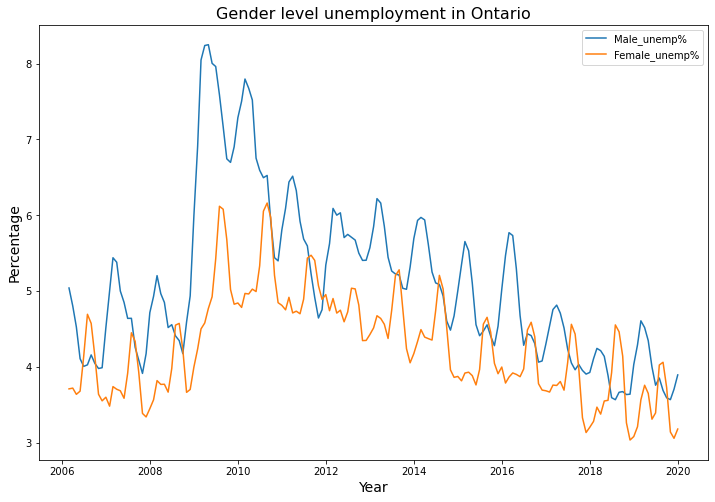

In [167]:
# Plot gender unemployment in Ontario

line_plot(ontario_gender_unemp,['Male_unemp%', 'Female_unemp%'],
         "Gender level unemployment in Ontario","Year","Percentage")

#plt.savefig('ONtimeSe_GenderUnemp.png');

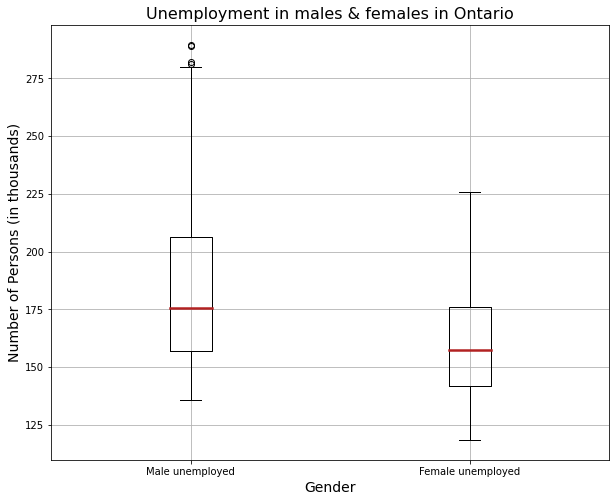

In [168]:
medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(ontario_gender_unemp[['Male_Unemployed','Female_Unemployed']],\
            labels=['Male unemployed','Female unemployed'],
           medianprops=medianprops)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Persons (in thousands)", fontsize=14)
plt.title("Unemployment in males & females in Ontario", fontsize=16)
plt.grid(True)
#plt.savefig('On_GenderUnemp.png');

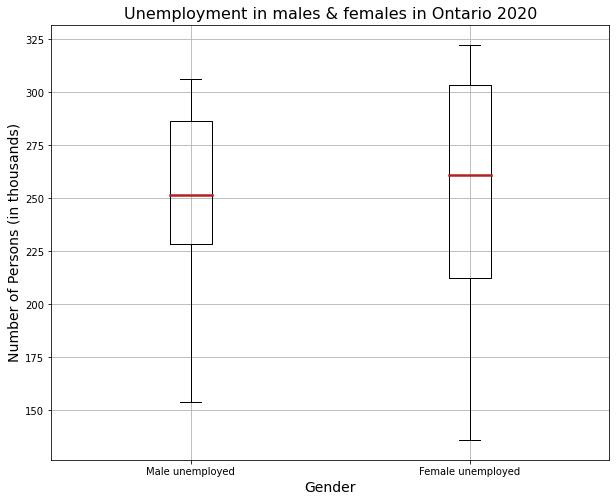

In [169]:
#For 2020

medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(ontario_gender_unemp2020[['Male_Unemployed','Female_Unemployed']],\
            labels=['Male unemployed','Female unemployed'],
           medianprops=medianprops)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Persons (in thousands)", fontsize=14)
plt.title("Unemployment in males & females in Ontario 2020", fontsize=16)
plt.grid(True);

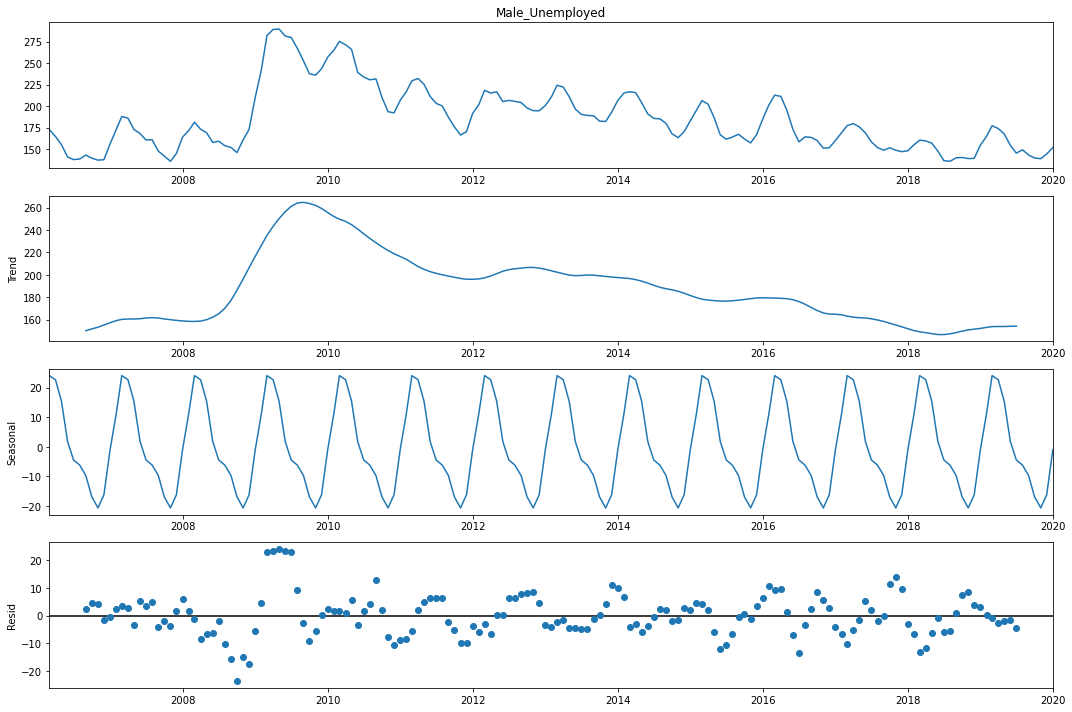

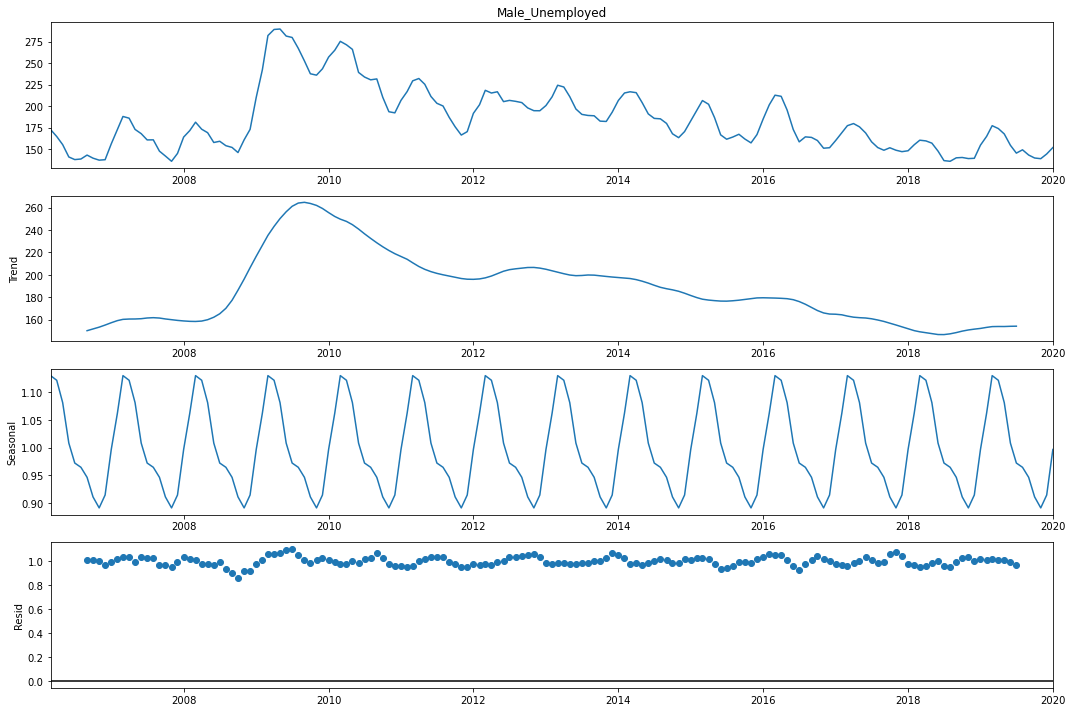

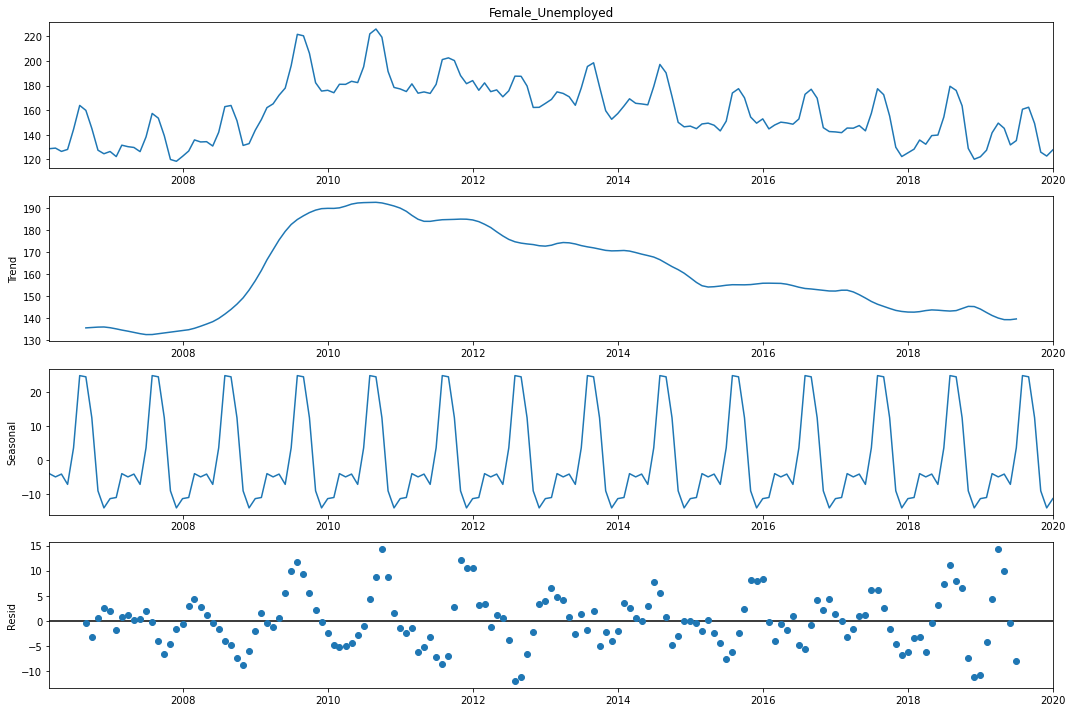

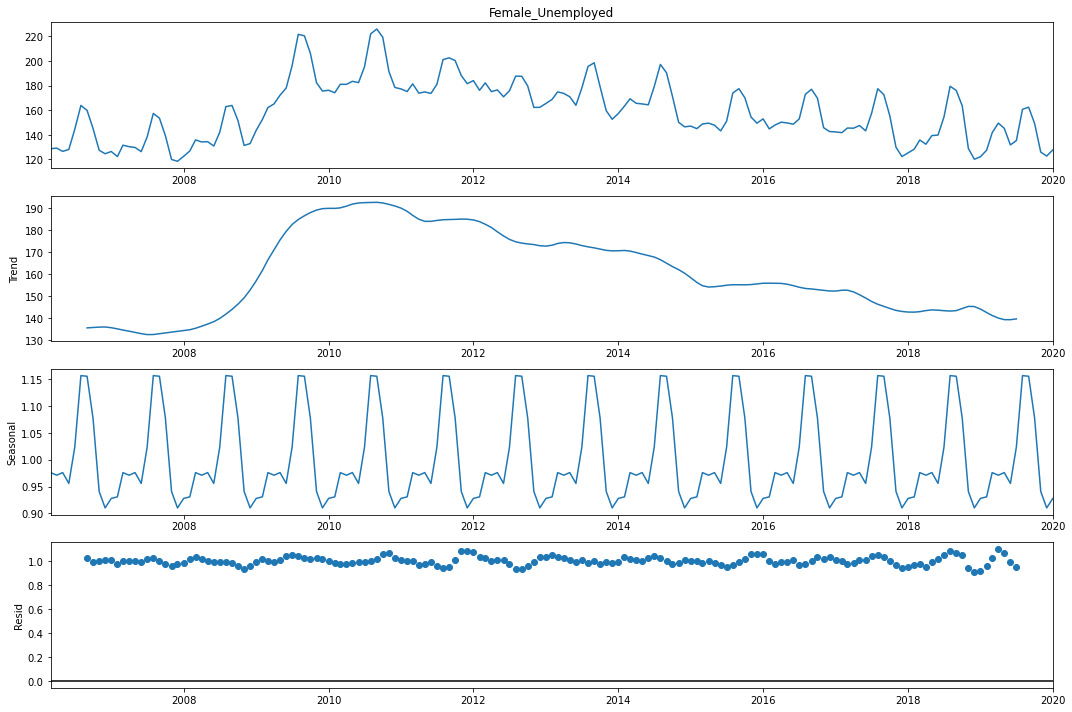

In [170]:
plot_seasoncalDeco(ontario_gender_unemp[['Male_Unemployed','Female_Unemployed']])

Text(0.5, 0.98, 'Ontario male & female unemployment (Age 25-64)')

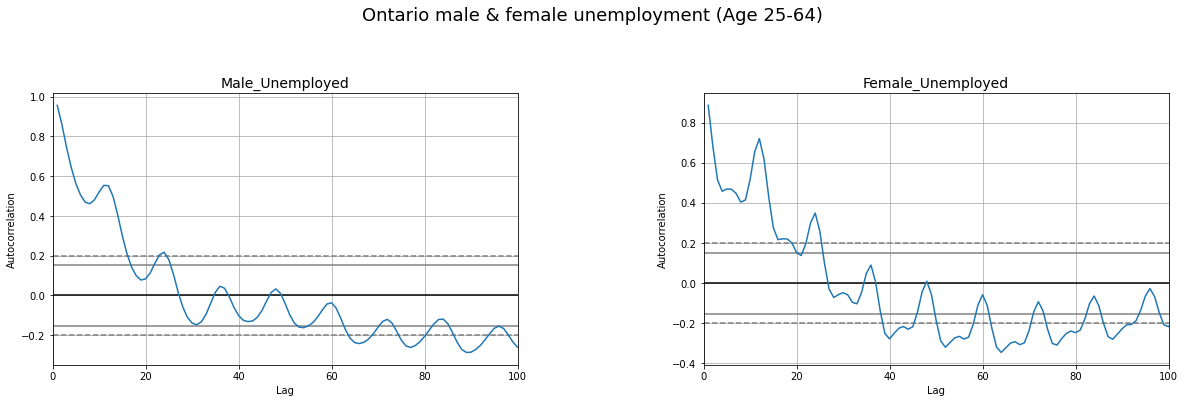

In [171]:
plot_autocorr(ontario_gender_unemp[['Male_Unemployed','Female_Unemployed']],2,2)
plt.suptitle("Ontario male & female unemployment (Age 25-64)", fontsize=18)

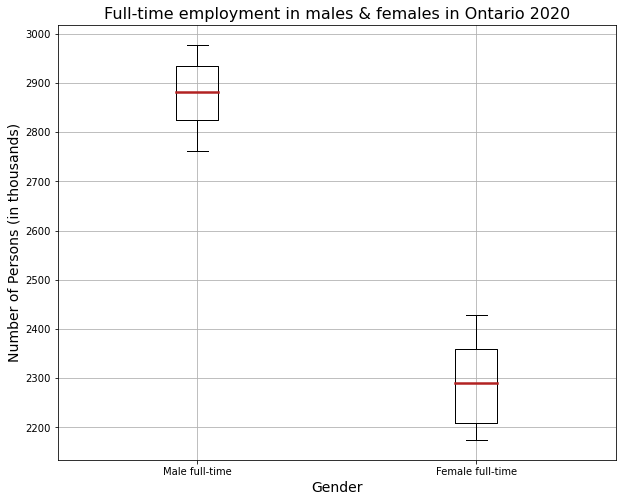

In [172]:
# full time employment in 2020

medianprops = dict(linewidth=2.5, color='firebrick')
plt.figure(figsize=(10,8))
plt.boxplot(ontario_gender_unemp2020[['Male_Full-time','Female_Full-time']],\
            labels=['Male full-time','Female full-time'],
           medianprops=medianprops)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Number of Persons (in thousands)", fontsize=14)
plt.title("Full-time employment in males & females in Ontario 2020", fontsize=16)
plt.grid(True)

#plt.savefig('On_GenderFullemp.png');

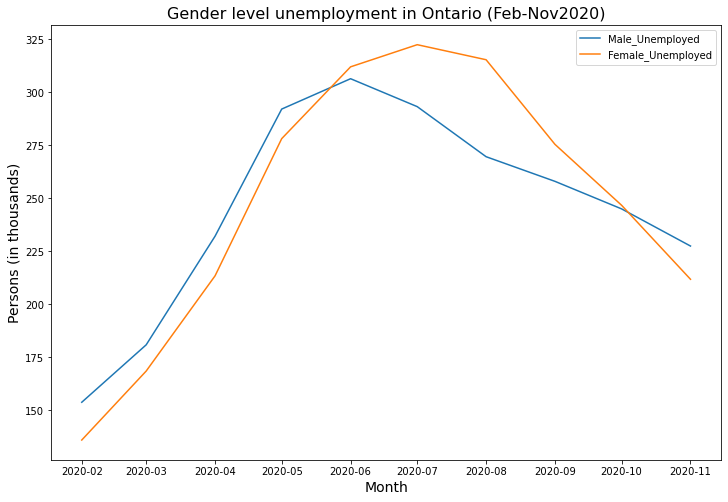

In [173]:
# Plot gender unemployment in Ontario from Feb 2020 to Nov 2020

line_plot(ontario_gender_unemp2020,['Male_Unemployed', 'Female_Unemployed'],
         "Gender level unemployment in Ontario (Feb-Nov2020)","Month","Persons (in thousands)")

###  Male and female full time jobs comparison

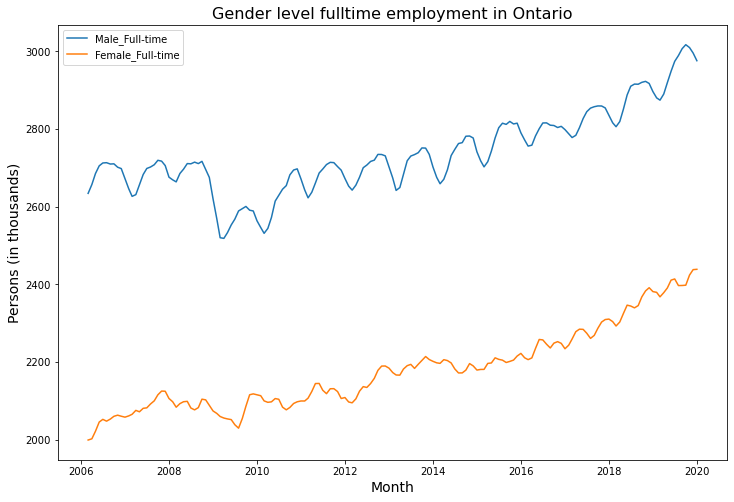

In [174]:
line_plot(ontario_gender_unemp,['Male_Full-time', 'Female_Full-time'],
         "Gender level fulltime employment in Ontario","Month","Persons (in thousands)")

In [175]:
# Check if % of male and female working full time is statistificantly significant

stats.ttest_ind(ontario_gender_unemp['Male_full%'],ontario_gender_unemp['Female_full%'])

Ttest_indResult(statistic=121.15055671349367, pvalue=7.55448453792623e-277)

#### Difference in average % of males and females working full time jobs in Ontario in the age group 25-64 is statistically significant at 0.05.
Difference being 17.34% . Average males working full-time is much more.

In [176]:
stats.ttest_ind(ontario_gender_unemp2020['Male_full%'],ontario_gender_unemp['Female_full%'])

Ttest_indResult(statistic=44.455908246790344, pvalue=2.8314605128930216e-97)

#### Difference in average % of males and females working full time jobs in Ontario in the age group 25-64 during covid is statistically significant at 0.05.
Difference being 16.7% males. Average males working full-time is much more. Difference reduced by 0.64% during covid lockdowns of 2020.

In [177]:
# Aggregate based on year

ontario_unemp_annual = ontario_gender_unemp.reset_index()

ontario_unemp_annual = ontario_unemp_annual.groupby(ontario_unemp_annual['Month'].dt.to_period('A'))\
[['Male_pop','Female_pop','Male_Unemployed','Female_Unemployed']].agg('sum')

ontario_unemp_annual

,Male_pop,Female_pop,Male_Unemployed,Female_Unemployed
Month,,,,
2006,34353.424,34895.052,1465.876,1377.964
2007,41526.008,42353.692,1934.032,1593.548
2008,41861.300,42857.820,1960.064,1669.092
2009,42170.576,43385.576,3110.280,2175.532
2010,42501.728,43900.288,2864.516,2310.424
2011,42826.936,44362.408,2423.300,2210.432
2012,43103.380,44673.788,2450.812,2119.776
2013,43350.264,45013.176,2390.164,2080.764
2014,43616.916,45353.432,2300.072,2019.340


In [178]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]

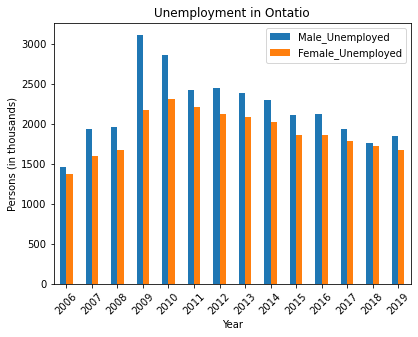

<Figure size 460.8x345.6 with 0 Axes>

In [179]:
#plt.figure(figsize=(20,10))
ontario_unemp_annual[:'2019'][['Male_Unemployed','Female_Unemployed']].plot(kind='bar', rot=45)
plt.xlabel('Year')
plt.ylabel('Persons (in thousands)')
plt.title("Unemployment in Ontatio")
plt.show()

plt.savefig('On_GenderUnempbar.png');